##**BITS F464 - Semester 1 - MACHINE LEARNING**
--------------------------------------------------------------------------------

**ASSIGNMENT 2 – DECISION TREES AND SUPPORT VECTOR MACHINES**
--------------------------------------------------------------------------------
*-Please rename the file as "TeamXX_Assignment2.ipynb"*

***Team number:*** 31

---
(*In Title case, separated with commas*)
***Full names of all students in the team:***
Kushal Chakraborty,Ajinkya Medhekar, Ashutosh Wagh, S Shashank, Srinidhi P Katte
---
(*Separated by commas*)
***Id number of all students in the team:***
2022H1030089H, 2022H1030099H, 2022H1030052H, 2022H1030067H, 2022H1030075H

This assignment aims to identify the differences between three Machine Learning models.

# ***1. Preprocess and perform exploratory data analysis of the dataset obtained***

In [1]:
import numpy as np
from pandas import read_csv
import matplotlib.pyplot as plt
from pandas import DataFrame
from sklearn.impute import SimpleImputer
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
import time
import numpy
import pandas
import random
import plotly.graph_objects as go
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
import warnings
warnings.filterwarnings('ignore')

In [2]:
features = read_csv('attributes.csv', delim_whitespace = True)
dataset_dataframe = read_csv('communities.data', names = features['attributes'])

In [3]:
dataset_dataframe = dataset_dataframe.drop(columns=['state','county','community','communityname','fold'], axis=1)
dataset_dataframe.head()

population  householdsize  racepctblack  racePctWhite  racePctAsian  \
0        0.19           0.33          0.02          0.90          0.12   
1        0.00           0.16          0.12          0.74          0.45   
2        0.00           0.42          0.49          0.56          0.17   
3        0.04           0.77          1.00          0.08          0.12   
4        0.01           0.55          0.02          0.95          0.09   

   racePctHisp  agePct12t21  agePct12t29  agePct16t24  agePct65up  ...  \
0         0.17         0.34         0.47         0.29        0.32  ...   
1         0.07         0.26         0.59         0.35        0.27  ...   
2         0.04         0.39         0.47         0.28        0.32  ...   
3         0.10         0.51         0.50         0.34        0.21  ...   
4         0.05         0.38         0.38         0.23        0.36  ...   

   LandArea  PopDens  PctUsePubTrans  PolicCars  PolicOperBudg  \
0      0.12     0.26            0.20       0.06           0.04   
1      0.02     0.12            0.45          ?              ?   
2      0.01     0.21            0.02          ?              ?   
3      0.02     0.39            0.28          ?              ?   
4      0.04     0.09            0.02          ?              ?   

   LemasPctPolicOnPatr  LemasGangUnitDeploy  LemasPctOfficDrugUn  \
0                  0.9                  0.5                 0.32   
1                    ?                    ?                 0.00   
2                    ?                    ?                 0.00   
3                    ?                    ?                 0.00   
4                    ?                    ?                 0.00   

   PolicBudgPerPop  ViolentCrimesPerPop  
0             0.14                 0.20  
1                ?                 0.67  
2                ?                 0.43  
3                ?                 0.12  
4                ?                 0.03  

[5 rows x 123 columns]

### Observation

We have deleted some features which are not very useful for models in order to predict the labels

In [4]:
dataset_dataframe = dataset_dataframe.replace('?', np.nan)
features_missing_values = dataset_dataframe.columns[dataset_dataframe.isnull().any()]

In [5]:
print(features_missing_values)
features_missing_values.shape

Index(['OtherPerCap', 'LemasSwornFT', 'LemasSwFTPerPop', 'LemasSwFTFieldOps',
       'LemasSwFTFieldPerPop', 'LemasTotalReq', 'LemasTotReqPerPop',
       'PolicReqPerOffic', 'PolicPerPop', 'RacialMatchCommPol',
       'PctPolicWhite', 'PctPolicBlack', 'PctPolicHisp', 'PctPolicAsian',
       'PctPolicMinor', 'OfficAssgnDrugUnits', 'NumKindsDrugsSeiz',
       'PolicAveOTWorked', 'PolicCars', 'PolicOperBudg', 'LemasPctPolicOnPatr',
       'LemasGangUnitDeploy', 'PolicBudgPerPop'],
      dtype='object')


(23,)

### Observation
There are 23 features which have missing values.

In [6]:
replace_missingval_with_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
replace_missingval_with_mean = replace_missingval_with_mean.fit(dataset_dataframe[['OtherPerCap']])
dataset_dataframe[['OtherPerCap']] = replace_missingval_with_mean.transform(dataset_dataframe[['OtherPerCap']])
dataset_dataframe = dataset_dataframe.dropna(axis=1)
print(dataset_dataframe.shape)
dataset_dataframe.head()

(1994, 101)


population  householdsize  racepctblack  racePctWhite  racePctAsian  \
0        0.19           0.33          0.02          0.90          0.12   
1        0.00           0.16          0.12          0.74          0.45   
2        0.00           0.42          0.49          0.56          0.17   
3        0.04           0.77          1.00          0.08          0.12   
4        0.01           0.55          0.02          0.95          0.09   

   racePctHisp  agePct12t21  agePct12t29  agePct16t24  agePct65up  ...  \
0         0.17         0.34         0.47         0.29        0.32  ...   
1         0.07         0.26         0.59         0.35        0.27  ...   
2         0.04         0.39         0.47         0.28        0.32  ...   
3         0.10         0.51         0.50         0.34        0.21  ...   
4         0.05         0.38         0.38         0.23        0.36  ...   

   PctForeignBorn  PctBornSameState  PctSameHouse85  PctSameCity85  \
0            0.12              0.42            0.50           0.51   
1            0.21              0.50            0.34           0.60   
2            0.14              0.49            0.54           0.67   
3            0.19              0.30            0.73           0.64   
4            0.11              0.72            0.64           0.61   

   PctSameState85  LandArea  PopDens  PctUsePubTrans  LemasPctOfficDrugUn  \
0            0.64      0.12     0.26            0.20                 0.32   
1            0.52      0.02     0.12            0.45                 0.00   
2            0.56      0.01     0.21            0.02                 0.00   
3            0.65      0.02     0.39            0.28                 0.00   
4            0.53      0.04     0.09            0.02                 0.00   

   ViolentCrimesPerPop  
0                 0.20  
1                 0.67  
2                 0.43  
3                 0.12  
4                 0.03  

[5 rows x 101 columns]

### Observation 

We have replaced the missing values in each feature with the mean of all the values contained within them.

In [7]:
X = dataset_dataframe.iloc[:, 0:100].values
y = dataset_dataframe.iloc[:, 100].values

In [8]:
frequency_dict = {}

# Iterate through the specified ranges
for i in range(0, 1000):
    lower_bound = i / 10
    upper_bound = (i + 1) / 10
    count = sum(1 for num in y if lower_bound <= num < upper_bound)
    frequency_dict[f'{lower_bound}-{upper_bound}'] = count

# Print the frequencies
for key, value in frequency_dict.items():
    print(f'Frequency of numbers in range {key}: {value}')

Frequency of numbers in range 0.0-0.1: 679
Frequency of numbers in range 0.1-0.2: 470
Frequency of numbers in range 0.2-0.3: 285
Frequency of numbers in range 0.3-0.4: 174
Frequency of numbers in range 0.4-0.5: 97
Frequency of numbers in range 0.5-0.6: 98
Frequency of numbers in range 0.6-0.7: 69
Frequency of numbers in range 0.7-0.8: 32
Frequency of numbers in range 0.8-0.9: 33
Frequency of numbers in range 0.9-1.0: 13
Frequency of numbers in range 1.0-1.1: 44
Frequency of numbers in range 1.1-1.2: 0
Frequency of numbers in range 1.2-1.3: 0
Frequency of numbers in range 1.3-1.4: 0
Frequency of numbers in range 1.4-1.5: 0
Frequency of numbers in range 1.5-1.6: 0
Frequency of numbers in range 1.6-1.7: 0
Frequency of numbers in range 1.7-1.8: 0
Frequency of numbers in range 1.8-1.9: 0
Frequency of numbers in range 1.9-2.0: 0
Frequency of numbers in range 2.0-2.1: 0
Frequency of numbers in range 2.1-2.2: 0
Frequency of numbers in range 2.2-2.3: 0
Frequency of numbers in range 2.3-2.4: 0
F

### Observation

Since the target "ViolentCrimesPerPop" has continuous values, we need to discretize the values to create different classes. In order to discretize the values, we are trying to observe the frequency of numbers present in each range.

In [9]:
y_data=[]
for i in y:
    if i>=0.0 and i<0.1:
        y_data.append(1)
    elif i>= 0.1 and i<0.2:
        y_data.append(2)
    else:
        y_data.append(3)
    

In [10]:
dataset_dataframe['label'] = y_data
dataset_dataframe.head()

population  householdsize  racepctblack  racePctWhite  racePctAsian  \
0        0.19           0.33          0.02          0.90          0.12   
1        0.00           0.16          0.12          0.74          0.45   
2        0.00           0.42          0.49          0.56          0.17   
3        0.04           0.77          1.00          0.08          0.12   
4        0.01           0.55          0.02          0.95          0.09   

   racePctHisp  agePct12t21  agePct12t29  agePct16t24  agePct65up  ...  \
0         0.17         0.34         0.47         0.29        0.32  ...   
1         0.07         0.26         0.59         0.35        0.27  ...   
2         0.04         0.39         0.47         0.28        0.32  ...   
3         0.10         0.51         0.50         0.34        0.21  ...   
4         0.05         0.38         0.38         0.23        0.36  ...   

   PctBornSameState  PctSameHouse85  PctSameCity85  PctSameState85  LandArea  \
0              0.42            0.50           0.51            0.64      0.12   
1              0.50            0.34           0.60            0.52      0.02   
2              0.49            0.54           0.67            0.56      0.01   
3              0.30            0.73           0.64            0.65      0.02   
4              0.72            0.64           0.61            0.53      0.04   

   PopDens  PctUsePubTrans  LemasPctOfficDrugUn  ViolentCrimesPerPop  label  
0     0.26            0.20                 0.32                 0.20      3  
1     0.12            0.45                 0.00                 0.67      3  
2     0.21            0.02                 0.00                 0.43      3  
3     0.39            0.28                 0.00                 0.12      2  
4     0.09            0.02                 0.00                 0.03      1  

[5 rows x 102 columns]

### Observation

After Observing the frequency of values present in each range, we have divided them into three classes. <br> 
1) The first class i.e Label = 1 contains values between 0.0 and 0.1. <br>
2) The second class i.e Label = 2 contains values between 0.1 and 0.2. <br>
3) The other values belong to class with Label = 3.

In [11]:
dataset_dataframe.describe().T

count      mean       std  min   25%   50%   75%  max
population           1994.0  0.057593  0.126906  0.0  0.01  0.02  0.05  1.0
householdsize        1994.0  0.463395  0.163717  0.0  0.35  0.44  0.54  1.0
racepctblack         1994.0  0.179629  0.253442  0.0  0.02  0.06  0.23  1.0
racePctWhite         1994.0  0.753716  0.244039  0.0  0.63  0.85  0.94  1.0
racePctAsian         1994.0  0.153681  0.208877  0.0  0.04  0.07  0.17  1.0
...                     ...       ...       ...  ...   ...   ...   ...  ...
PopDens              1994.0  0.232854  0.203092  0.0  0.10  0.17  0.28  1.0
PctUsePubTrans       1994.0  0.161685  0.229055  0.0  0.02  0.07  0.19  1.0
LemasPctOfficDrugUn  1994.0  0.094052  0.240328  0.0  0.00  0.00  0.00  1.0
ViolentCrimesPerPop  1994.0  0.237979  0.232985  0.0  0.07  0.15  0.33  1.0
label                1994.0  2.083250  0.870484  1.0  1.00  2.00  3.00  3.0

[102 rows x 8 columns]

### Observation

The above contains the statistical measures of various features.

In [12]:
dataset_dataframe.isna().sum()

population             0
householdsize          0
racepctblack           0
racePctWhite           0
racePctAsian           0
                      ..
PopDens                0
PctUsePubTrans         0
LemasPctOfficDrugUn    0
ViolentCrimesPerPop    0
label                  0
Length: 102, dtype: int64

### Observation

There are no missing values in none of the features.

In [13]:
num_datapoints_label_1 = (dataset_dataframe['label'] == 1).sum()
num_datapoints_label_2 = (dataset_dataframe['label'] == 2).sum()
num_datapoints_label_3 = (dataset_dataframe['label'] == 3).sum()
plotfigure = go.Figure(go.Bar(x=['Label = 1', 'Label =2','Label =3'], y=[num_datapoints_label_1, num_datapoints_label_2,num_datapoints_label_3], marker_color=['red', 'green','blue']))
plotfigure.update_layout(title='Number of Instances with Label = 1 vs. Label = 2 vs Label = 3', xaxis_title='Types of Classes', yaxis_title='Number of Datapoints')

In [14]:
print("Number of datapoints with Label = 1 is : ")
dataset_dataframe[dataset_dataframe['label'] == 1].shape[0]

Number of datapoints with Label = 1 is : 


679

In [15]:
print("Number of datapoints with Label = 2 is : ")
dataset_dataframe[dataset_dataframe['label'] == 2].shape[0]

Number of datapoints with Label = 2 is : 


470

In [16]:
print("Number of datapoints with Label = 3 is : ")
dataset_dataframe[dataset_dataframe['label'] == 3].shape[0]

Number of datapoints with Label = 3 is : 


845

### Observation

The dataset is somewhat balanced but imbalance exists to a certain extent in the dataset after discretization. 

In [17]:
dataset_dataframe[dataset_dataframe['label'] == 1].describe()

population  householdsize  racepctblack  racePctWhite  racePctAsian  \
count  679.000000     679.000000    679.000000    679.000000    679.000000   
mean     0.019764       0.483520      0.044728      0.917349      0.132680   
std      0.024385       0.148192      0.073164      0.085830      0.164321   
min      0.000000       0.070000      0.000000      0.390000      0.010000   
25%      0.000000       0.380000      0.010000      0.890000      0.040000   
50%      0.010000       0.460000      0.020000      0.950000      0.070000   
75%      0.030000       0.560000      0.050000      0.970000      0.150000   
max      0.160000       1.000000      0.720000      1.000000      1.000000   

       racePctHisp  agePct12t21  agePct12t29  agePct16t24  agePct65up  ...  \
count   679.000000   679.000000   679.000000   679.000000  679.000000  ...   
mean      0.045243     0.418351     0.463373     0.315920    0.402901  ...   
std       0.076717     0.170435     0.154009     0.184569    0.174220  ...   
min       0.000000     0.060000     0.030000     0.010000    0.000000  ...   
25%       0.010000     0.320000     0.380000     0.230000    0.260000  ...   
50%       0.020000     0.380000     0.430000     0.260000    0.420000  ...   
75%       0.050000     0.440000     0.500000     0.310000    0.520000  ...   
max       1.000000     1.000000     1.000000     1.000000    1.000000  ...   

       PctBornSameState  PctSameHouse85  PctSameCity85  PctSameState85  \
count        679.000000      679.000000     679.000000      679.000000   
mean           0.642680        0.594595       0.632032        0.665552   
std            0.190277        0.196675       0.213655        0.201128   
min            0.000000        0.000000       0.000000        0.000000   
25%            0.530000        0.485000       0.530000        0.570000   
50%            0.680000        0.610000       0.680000        0.720000   
75%            0.790000        0.740000       0.790000        0.810000   
max            0.990000        0.990000       0.980000        0.970000   

         LandArea     PopDens  PctUsePubTrans  LemasPctOfficDrugUn  \
count  679.000000  679.000000      679.000000           679.000000   
mean     0.050339    0.174610        0.154492             0.016510   
std      0.060000    0.144048        0.208863             0.099901   
min      0.000000    0.000000        0.000000             0.000000   
25%      0.020000    0.070000        0.020000             0.000000   
50%      0.040000    0.140000        0.070000             0.000000   
75%      0.070000    0.230000        0.180000             0.000000   
max      1.000000    1.000000        1.000000             1.000000   

       ViolentCrimesPerPop  label  
count           679.000000  679.0  
mean              0.049308    1.0  
std               0.024404    0.0  
min               0.000000    1.0  
25%               0.030000    1.0  
50%               0.050000    1.0  
75%               0.070000    1.0  
max               0.090000    1.0  

[8 rows x 102 columns]

### Observation

The statistical measures of the datapoints belonging to class with label 1.

In [18]:
dataset_dataframe[dataset_dataframe['label'] == 2].describe()

population  householdsize  racepctblack  racePctWhite  racePctAsian  \
count  470.000000     470.000000    470.000000    470.000000    470.000000   
mean     0.036319       0.444830      0.117191      0.816681      0.159766   
std      0.054502       0.148854      0.167030      0.166057      0.211910   
min      0.000000       0.030000      0.000000      0.000000      0.000000   
25%      0.010000       0.340000      0.020000      0.752500      0.040000   
50%      0.020000       0.425000      0.050000      0.870000      0.080000   
75%      0.040000       0.530000      0.140000      0.930000      0.180000   
max      0.620000       1.000000      1.000000      1.000000      1.000000   

       racePctHisp  agePct12t21  agePct12t29  agePct16t24  agePct65up  ...  \
count   470.000000   470.000000   470.000000   470.000000  470.000000  ...   
mean      0.118191     0.417085     0.493596     0.335277    0.426383  ...   
std       0.173003     0.168098     0.151983     0.181324    0.195132  ...   
min       0.000000     0.000000     0.000000     0.000000    0.000000  ...   
25%       0.020000     0.320000     0.410000     0.240000    0.290000  ...   
50%       0.050000     0.390000     0.470000     0.290000    0.410000  ...   
75%       0.140000     0.470000     0.540000     0.350000    0.540000  ...   
max       1.000000     1.000000     1.000000     1.000000    1.000000  ...   

       PctBornSameState  PctSameHouse85  PctSameCity85  PctSameState85  \
count        470.000000      470.000000     470.000000      470.000000   
mean           0.595468        0.524106       0.602681        0.646468   
std            0.203554        0.189805       0.210646        0.203030   
min            0.000000        0.000000       0.000000        0.000000   
25%            0.460000        0.380000       0.480000        0.560000   
50%            0.615000        0.540000       0.630000        0.700000   
75%            0.750000        0.660000       0.760000        0.790000   
max            1.000000        1.000000       1.000000        1.000000   

         LandArea     PopDens  PctUsePubTrans  LemasPctOfficDrugUn  \
count  470.000000  470.000000      470.000000           470.000000   
mean     0.050936    0.223979        0.145830             0.054447   
std      0.072943    0.175107        0.214357             0.186995   
min      0.000000    0.020000        0.000000             0.000000   
25%      0.020000    0.102500        0.020000             0.000000   
50%      0.030000    0.180000        0.060000             0.000000   
75%      0.060000    0.270000        0.170000             0.000000   
max      0.990000    1.000000        1.000000             1.000000   

       ViolentCrimesPerPop  label  
count            470.00000  470.0  
mean               0.13934    2.0  
std                0.02858    0.0  
min                0.10000    2.0  
25%                0.11000    2.0  
50%                0.14000    2.0  
75%                0.16000    2.0  
max                0.19000    2.0  

[8 rows x 102 columns]

### Observation

The statistical measures of the datapoints belonging to class with label 2.

In [19]:
dataset_dataframe[dataset_dataframe['label'] == 3].describe()

population  householdsize  racepctblack  racePctWhite  racePctAsian  \
count  845.000000     845.000000    845.000000    845.000000    845.000000   
mean     0.099822       0.457550      0.322757      0.587207      0.167172   
std      0.180868       0.181069      0.307495      0.260546      0.236272   
min      0.000000       0.000000      0.000000      0.000000      0.000000   
25%      0.010000       0.340000      0.060000      0.420000      0.030000   
50%      0.040000       0.420000      0.210000      0.630000      0.070000   
75%      0.100000       0.530000      0.520000      0.790000      0.180000   
max      1.000000       1.000000      1.000000      0.990000      1.000000   

       racePctHisp  agePct12t21  agePct12t29  agePct16t24  agePct65up  ...  \
count   845.000000   845.000000   845.000000   845.000000  845.000000  ...   
mean      0.237763     0.432899     0.518521     0.353160    0.437657  ...   
std       0.298763     0.133068     0.124189     0.138605    0.172424  ...   
min       0.000000     0.000000     0.060000     0.040000    0.060000  ...   
25%       0.020000     0.360000     0.450000     0.280000    0.320000  ...   
50%       0.090000     0.420000     0.500000     0.320000    0.430000  ...   
75%       0.350000     0.490000     0.570000     0.390000    0.540000  ...   
max       1.000000     1.000000     1.000000     1.000000    1.000000  ...   

       PctBornSameState  PctSameHouse85  PctSameCity85  PctSameState85  \
count        845.000000      845.000000     845.000000      845.000000   
mean           0.589207        0.493290       0.635124        0.643077   
std            0.212302        0.148003       0.182225        0.192707   
min            0.000000        0.000000       0.000000        0.000000   
25%            0.440000        0.410000       0.540000        0.560000   
50%            0.610000        0.500000       0.670000        0.690000   
75%            0.770000        0.600000       0.760000        0.780000   
max            1.000000        0.930000       0.980000        0.960000   

         LandArea     PopDens  PctUsePubTrans  LemasPctOfficDrugUn  \
count  845.000000  845.000000      845.000000           845.000000   
mean     0.085148    0.284592        0.176284             0.178391   
std      0.147494    0.241324        0.250839             0.310011   
min      0.000000    0.000000        0.000000             0.000000   
25%      0.020000    0.120000        0.020000             0.000000   
50%      0.040000    0.190000        0.070000             0.000000   
75%      0.080000    0.360000        0.210000             0.350000   
max      1.000000    1.000000        1.000000             1.000000   

       ViolentCrimesPerPop  label  
count           845.000000  845.0  
mean              0.444450    3.0  
std               0.224747    0.0  
min               0.200000    3.0  
25%               0.260000    3.0  
50%               0.370000    3.0  
75%               0.570000    3.0  
max               1.000000    3.0  

[8 rows x 102 columns]

### Observation

The statistical measures of the datapoints belonging to class with label 3.

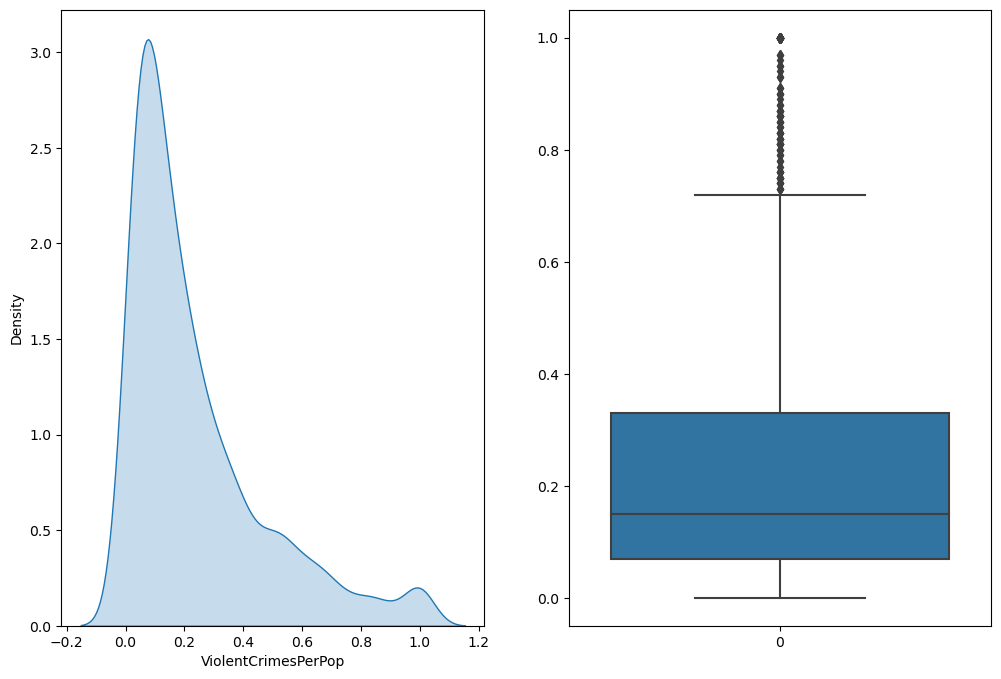

In [20]:
figure, figureaxis =plt.subplots(1,2,figsize=(12,8))
sns.kdeplot(dataset_dataframe['ViolentCrimesPerPop'],fill=True,ax=figureaxis[0])
sns.boxplot(dataset_dataframe['ViolentCrimesPerPop'],ax=figureaxis[1])
figure.show()

### Observation

The distribution of the target ViolentCrimesPerPop is slightly skewed and Gaussian in nature.

In [21]:
viocrperpop = dataset_dataframe['ViolentCrimesPerPop']

percentiles = [25, 50, 75, 90, 95]
percentile_values = np.percentile(viocrperpop, percentiles)

# Display percentile values
for i, p in enumerate(percentiles):
    print(f"{p}th percentile: {percentile_values[i]}")

25th percentile: 0.07
50th percentile: 0.15
75th percentile: 0.33
90th percentile: 0.59
95th percentile: 0.75


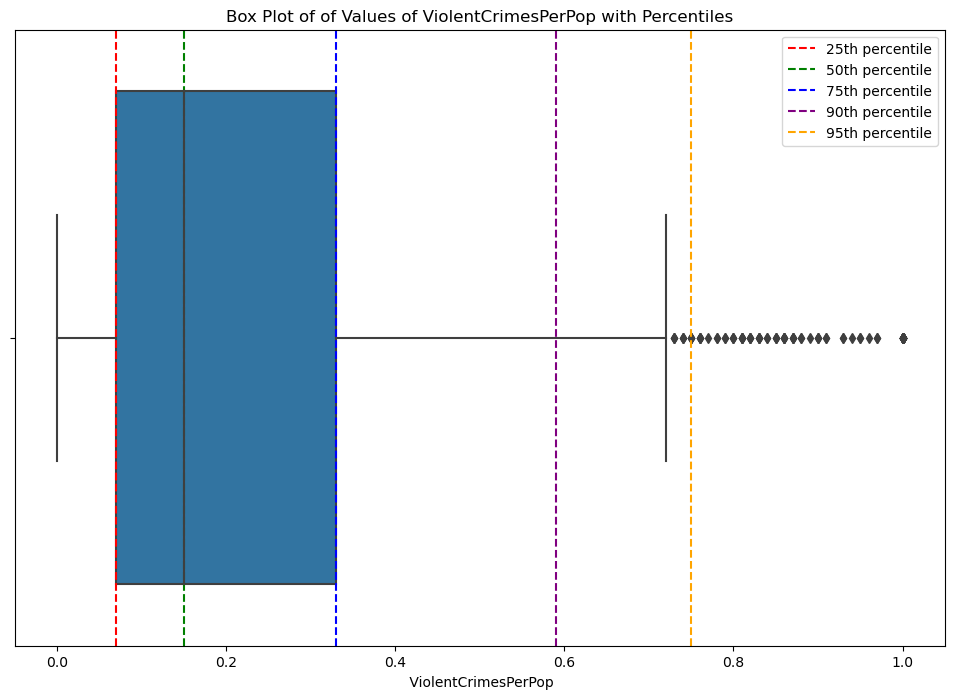

In [22]:
colors = ['red', 'green', 'blue', 'purple', 'orange']

# Create a box plot
plt.figure(figsize=(12, 8))
sns.boxplot(x=viocrperpop)
for p, value, color in zip(percentiles, percentile_values, colors):
    plt.axvline(value, color=color, linestyle='--', label=f'{p}th percentile')
plt.xlabel(' ViolentCrimesPerPop')
plt.legend()
plt.title('Box Plot of of Values of ViolentCrimesPerPop with Percentiles')
plt.show()


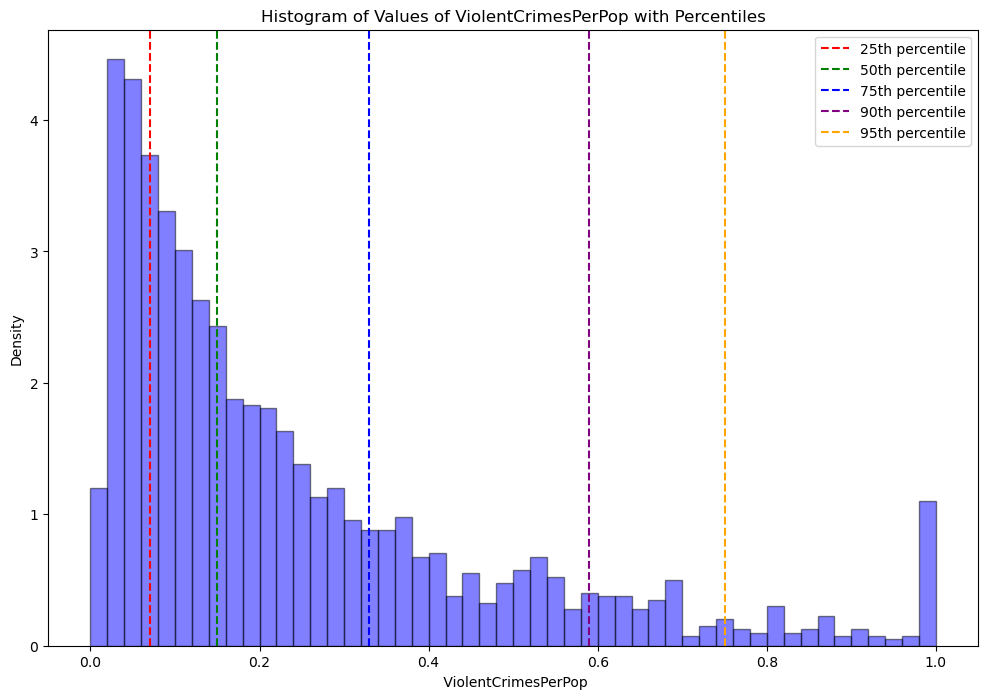

In [23]:
plt.figure(figsize=(12, 8))
plt.hist(viocrperpop, bins=50, color='blue', edgecolor='black', alpha=0.5, density=True)
for p, value, color in zip(percentiles, percentile_values, colors):
    plt.axvline(value, color=color, linestyle='--', label=f'{p}th percentile')
plt.xlabel(' ViolentCrimesPerPop')
plt.ylabel('Density')
plt.legend()
plt.title('Histogram of Values of ViolentCrimesPerPop with Percentiles')
plt.show()

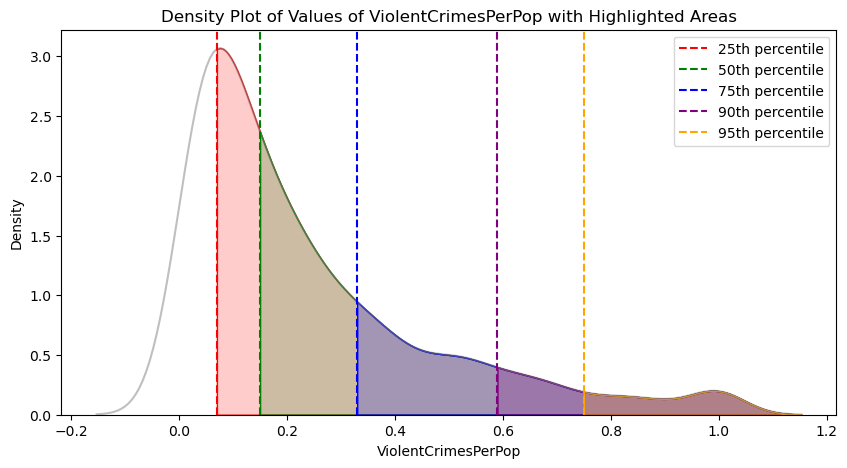

In [24]:
plt.figure(figsize=(10, 5))
sns.kdeplot(viocrperpop, fill=False, color='gray', alpha=0.5)

for p, value, color in zip(percentiles, percentile_values, colors):
    plt.axvline(value, color=color, linestyle='--', label=f'{p}th percentile')
    sns.kdeplot(viocrperpop, fill=True, clip=(value, np.inf), color=color, alpha=0.2)

plt.xlabel('ViolentCrimesPerPop')
plt.ylabel('Density')
plt.legend()
plt.title('Density Plot of Values of ViolentCrimesPerPop with Highlighted Areas')
plt.show()

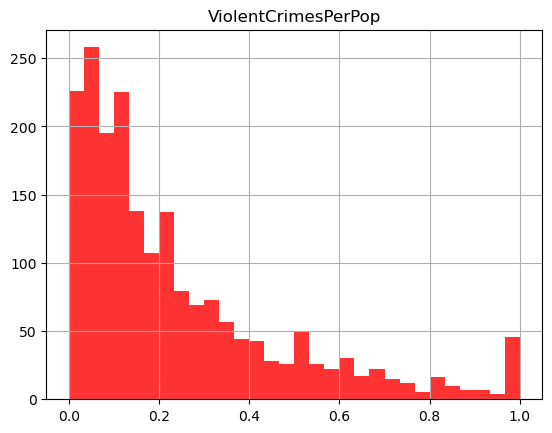

In [25]:
dataset_dataframe.hist(column = ['ViolentCrimesPerPop'], bins = 30, color = 'red', alpha = 0.8)
plt.show()

### Observation 

From the above graphs we can observe the median, 25th,75th percentiles. There are a large number of small values and less number of bigger values.

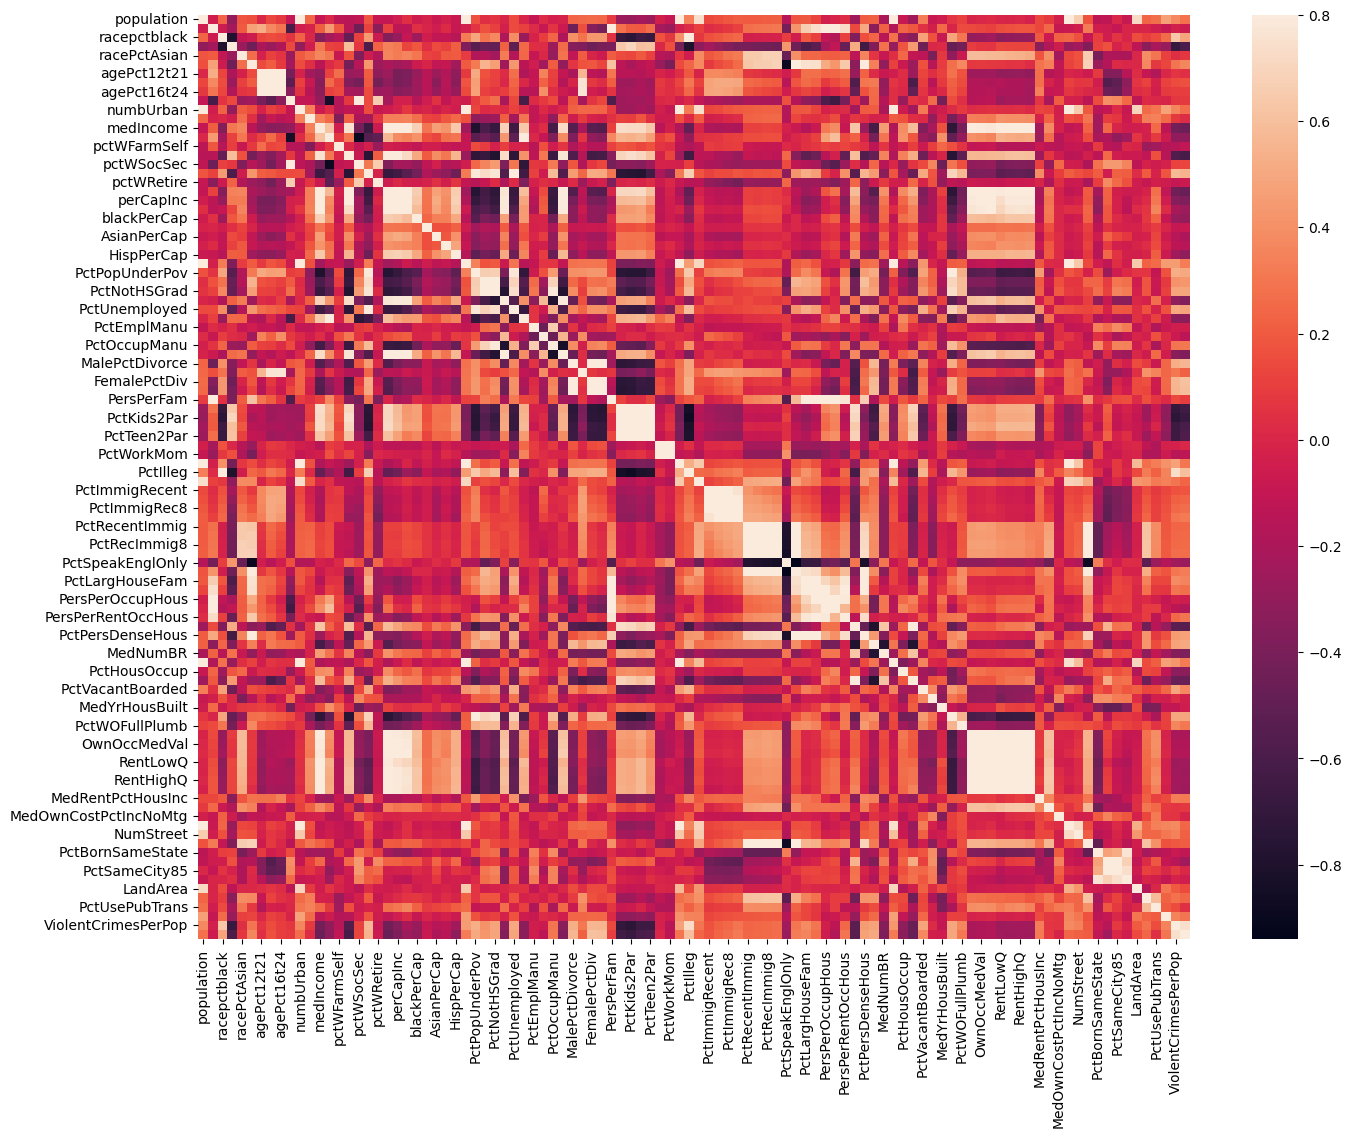

In [26]:
corrmat = dataset_dataframe.corr()
fig = plt.figure(figsize = (16, 12))

sns.heatmap(corrmat, vmax = 0.8)
plt.show()

In [27]:
corrT = dataset_dataframe.corr(method = 'pearson').round(4)
corrT = corrT.sort_values(by=['ViolentCrimesPerPop'])
corrT['ViolentCrimesPerPop']

PctKids2Par           -0.7384
PctFam2Par            -0.7067
racePctWhite          -0.6848
PctYoungKids2Par      -0.6661
PctTeen2Par           -0.6616
                        ...  
pctWPubAsst            0.5747
racepctblack           0.6313
PctIlleg               0.7380
label                  0.7486
ViolentCrimesPerPop    1.0000
Name: ViolentCrimesPerPop, Length: 102, dtype: float64

### Observation

The correlations between any pairs of features are not very high. 

### Dimensionality Reduction

Since there are 102 features, we will perform dimensionality reduction and use only 16 features for our ML models.

#### Principal Component Analysis

In this section we have implemented the Principal Component Analysis from scratch. Principal Component Analysis is a dimensionality reduction technique which uses the concept of eigen values and variance to reduce the number of dimensions or features of the dataset.

In [28]:
class PCA1:
    def __init__(self, n_components):
        self.n_components = n_components
        self.mean = None
        self.components = None
        self.explained_variance = None
        self.explained_variance_ratio = None

    def fit(self, X):
        # Calculate the mean of the data
        self.mean = np.mean(X, axis=0)

        # Center the data by subtracting the mean
        X_centered = X - self.mean

        # Compute the covariance matrix
        cov_matrix = np.cov(X_centered, rowvar=False)

        # Eigenvalue decomposition of the covariance matrix
        eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

        # Sort eigenvalues and eigenvectors in descending order
        sorted_indices = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[sorted_indices]
        eigenvectors = eigenvectors[:, sorted_indices]

        # Select the top n_components eigenvectors
        self.components = eigenvectors[:, :self.n_components]

        # Calculate explained variance and explained variance ratio
        total_variance = np.sum(eigenvalues)
        self.explained_variance = eigenvalues[:self.n_components]
        self.explained_variance_ratio = self.explained_variance / total_variance

    def transform(self, X):
        # Center the data by subtracting the mean
        X_centered = X - self.mean

        # Project the data onto the selected principal components
        return np.dot(X_centered, self.components)

In [29]:
pca = PCA1(n_components = 16)
pca.fit(X)
X_reduced = pca.transform(X)

In [30]:
X_reduced.shape[1]

16

### Observation

After performing dimensionality reduction using PCA we can see that the number of features have reduced from 101 to 16.

### Data Preparation

In [31]:
std = StandardScaler()
std.fit(X_reduced)
X_std = std.fit_transform(X_reduced)

### Observation

Since the scales of different features are different we are performing standardization and bringing the values between 0 and 1.

In [32]:
X_train, X_temp, y_train, y_temp = train_test_split(X_std, y_data, test_size=0.40, random_state=101)

# Split the temp dataset into cross-validation and test
X_validation, X_test, y_validation, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=101)

### Observation

We are dividing the entire dataset into the following three groups: <br>

1) 60 % of the dataset are training data used for training the ML models.<br>
2) 20 % of the dataset are validation data used for choosing the most appropriate hyperparameter.<br>
3) 20 % of the dataset are test data used for evaluating the performance of the model using the unseen dataset. 


In [33]:
columns = ['Feat1', 'Feat2', 'Feat3','Feat4','Feat5','Feat6','Feat7','Feat8','Feat9','Feat10','Feat11','Feat12','Feat13','Feat14','Feat15','Feat16']

# Convert 2D array to DataFrame
train_dataframe = pd.DataFrame(X_train, columns=columns)
train_dataframe['label'] = y_train
test_dataframe = pd.DataFrame(X_test, columns=columns)
test_dataframe['label'] = y_test
validation_dataframe = pd.DataFrame(X_validation, columns=columns)
validation_dataframe['label'] = y_validation

### Exploratory Data Analysis of Data to be given to Models

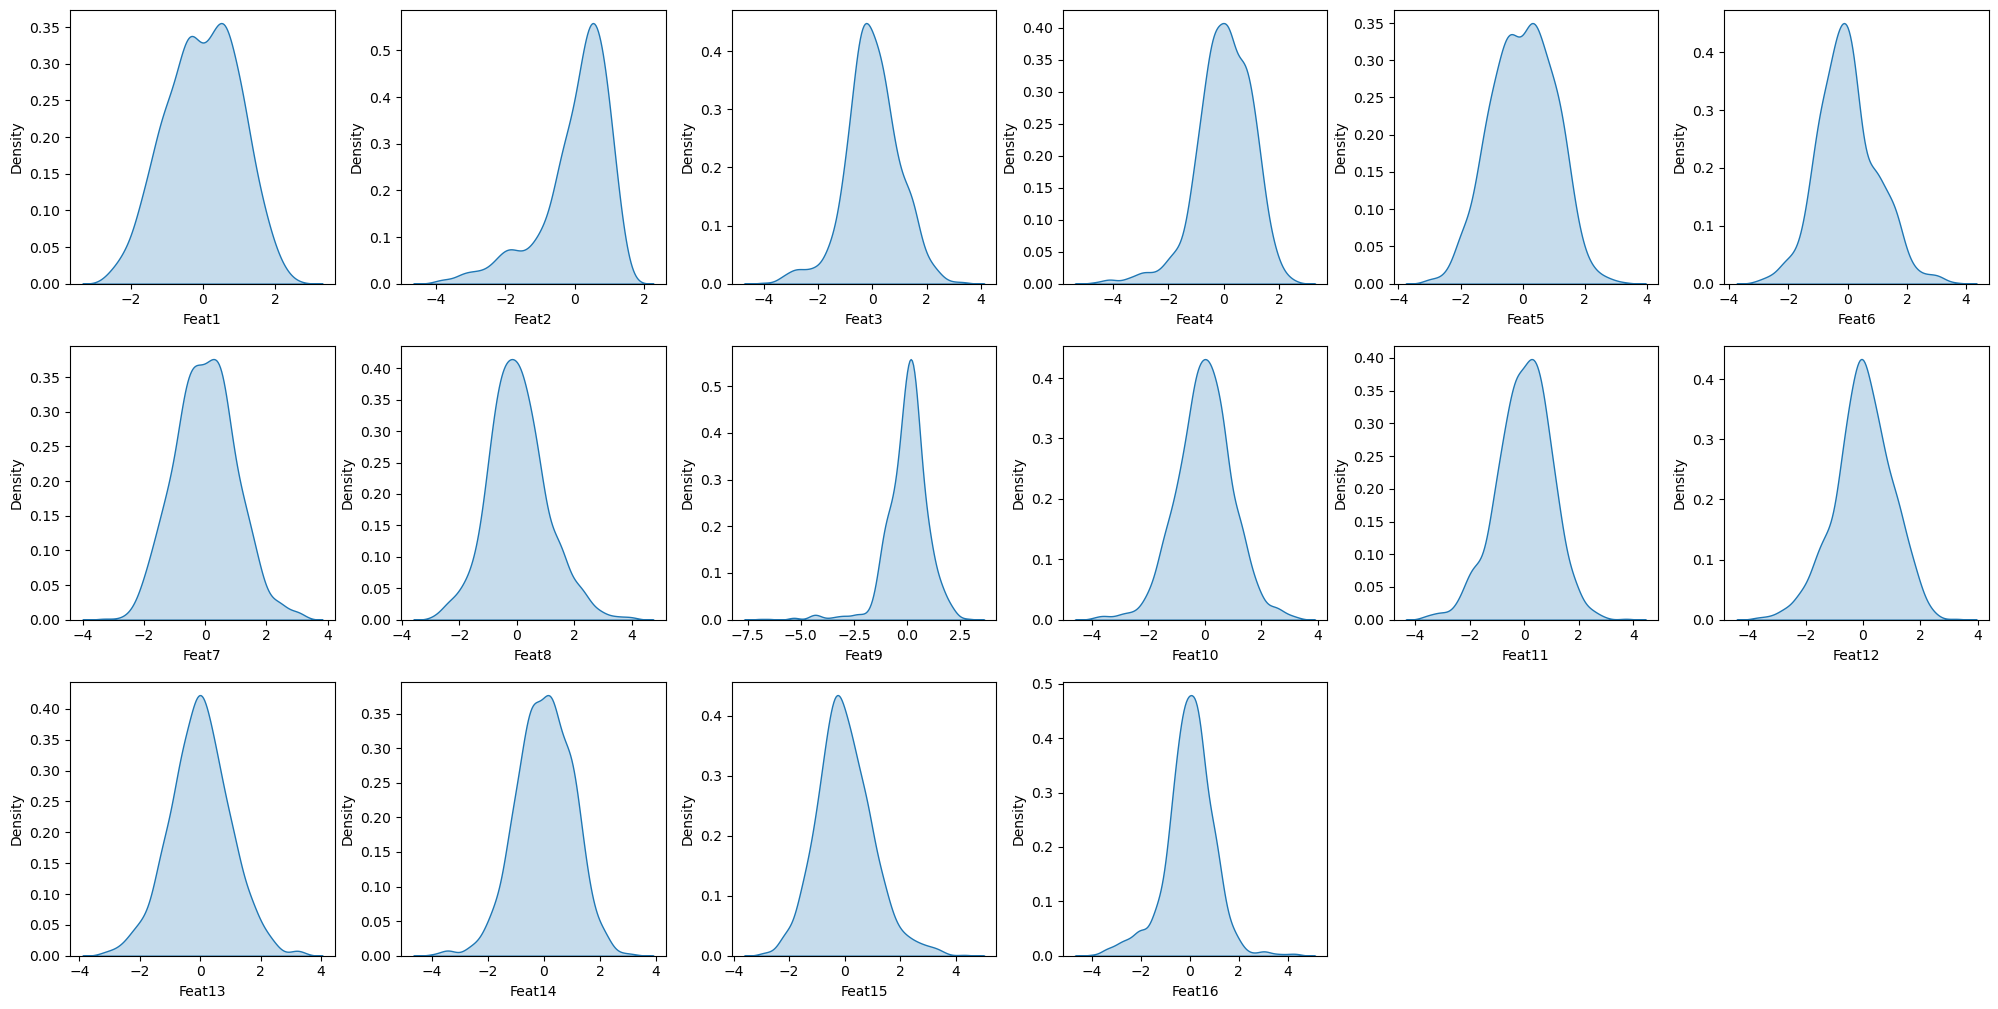

In [34]:
plt.figure(figsize=(20,40))
for i,feat in enumerate(columns,1):
    plt.subplot(12,6,i)
    sns.kdeplot(train_dataframe[feat],fill=True)
plt.tight_layout() 
plt.show()

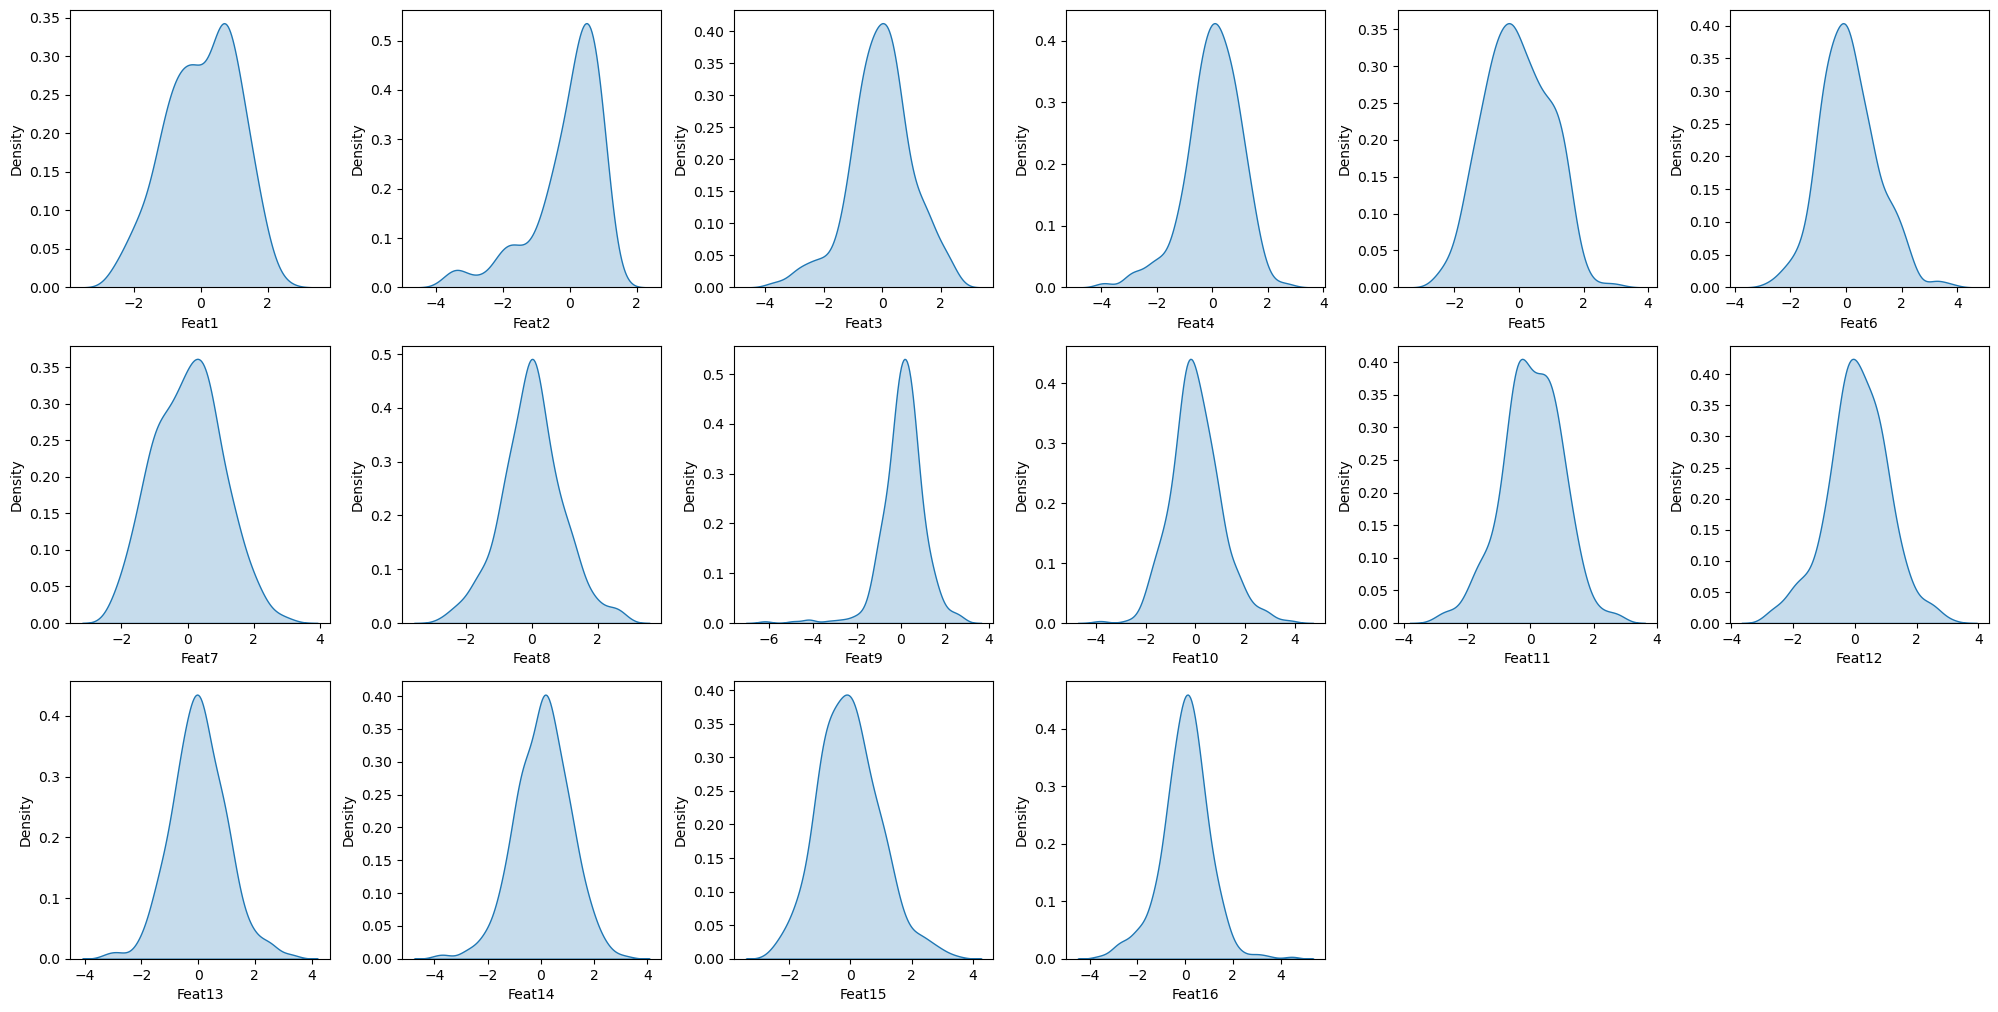

In [35]:
plt.figure(figsize=(20,40))
for i,feat in enumerate(columns,1):
    plt.subplot(12,6,i)
    sns.kdeplot(test_dataframe[feat],fill=True)
plt.tight_layout() 
plt.show()

### Observation 

Most of the features follow almost Gaussian distribution and the skewness of the data are very very less.

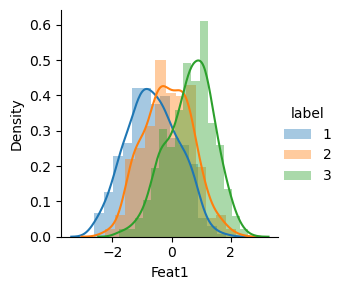

In [36]:
sns.FacetGrid(train_dataframe,hue="label")\
   .map(sns.distplot,"Feat1")\
   .add_legend();
plt.show()

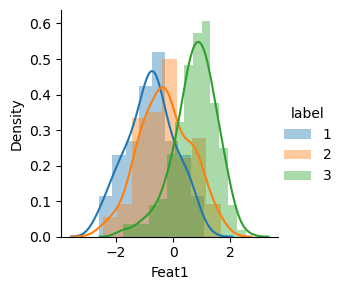

In [37]:
sns.FacetGrid(test_dataframe,hue="label")\
   .map(sns.distplot,"Feat1")\
   .add_legend();
plt.show()

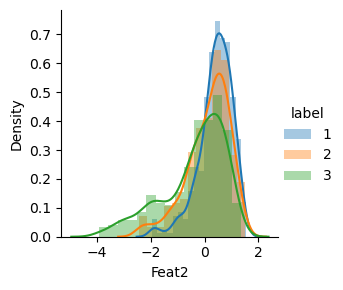

In [38]:
sns.FacetGrid(train_dataframe,hue="label")\
   .map(sns.distplot,"Feat2")\
   .add_legend();
plt.show()

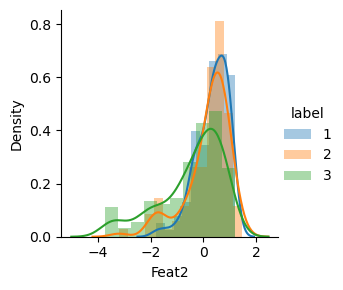

In [39]:
sns.FacetGrid(test_dataframe,hue="label")\
   .map(sns.distplot,"Feat2")\
   .add_legend();
plt.show()

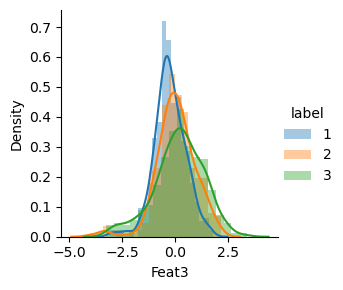

In [40]:
sns.FacetGrid(train_dataframe,hue="label")\
   .map(sns.distplot,"Feat3")\
   .add_legend();
plt.show()

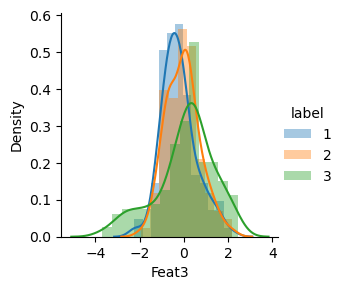

In [41]:
sns.FacetGrid(test_dataframe,hue="label")\
   .map(sns.distplot,"Feat3")\
   .add_legend();
plt.show()

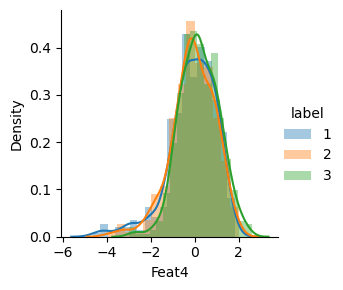

In [42]:
sns.FacetGrid(train_dataframe,hue="label")\
   .map(sns.distplot,"Feat4")\
   .add_legend();
plt.show()

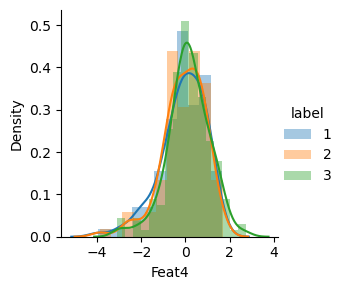

In [43]:
sns.FacetGrid(test_dataframe,hue="label")\
   .map(sns.distplot,"Feat4")\
   .add_legend();
plt.show()

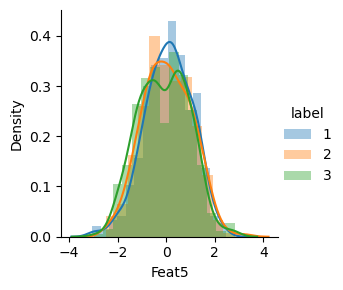

In [44]:
sns.FacetGrid(train_dataframe,hue="label")\
   .map(sns.distplot,"Feat5")\
   .add_legend();
plt.show()

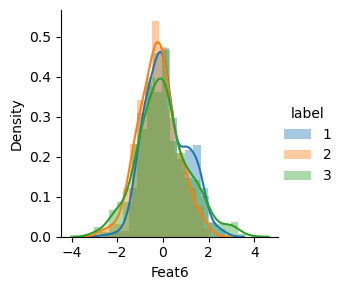

In [45]:
sns.FacetGrid(train_dataframe,hue="label")\
   .map(sns.distplot,"Feat6")\
   .add_legend();
plt.show()

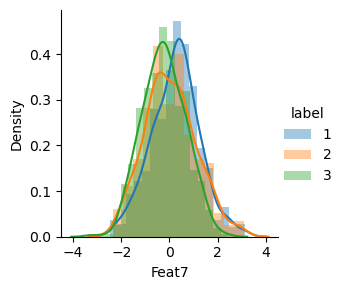

In [46]:
sns.FacetGrid(train_dataframe,hue="label")\
   .map(sns.distplot,"Feat7")\
   .add_legend();
plt.show()

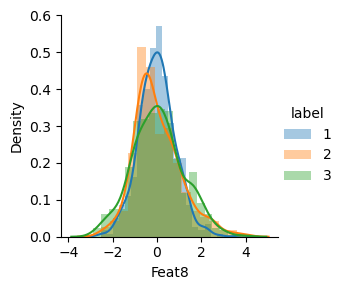

In [47]:
sns.FacetGrid(train_dataframe,hue="label")\
   .map(sns.distplot,"Feat8")\
   .add_legend();
plt.show()

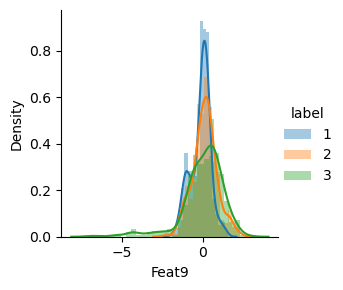

In [48]:
sns.FacetGrid(train_dataframe,hue="label")\
   .map(sns.distplot,"Feat9")\
   .add_legend();
plt.show()

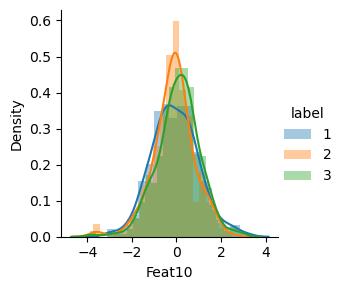

In [49]:
sns.FacetGrid(train_dataframe,hue="label")\
   .map(sns.distplot,"Feat10")\
   .add_legend();
plt.show()

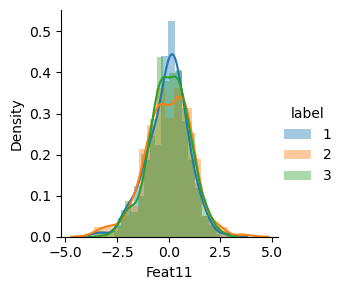

In [50]:
sns.FacetGrid(train_dataframe,hue="label")\
   .map(sns.distplot,"Feat11")\
   .add_legend();
plt.show()

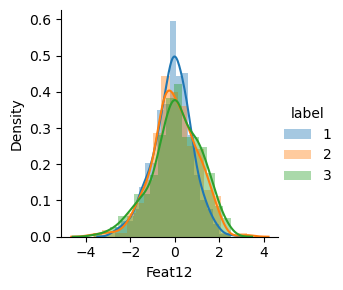

In [51]:
sns.FacetGrid(train_dataframe,hue="label")\
   .map(sns.distplot,"Feat12")\
   .add_legend();
plt.show()

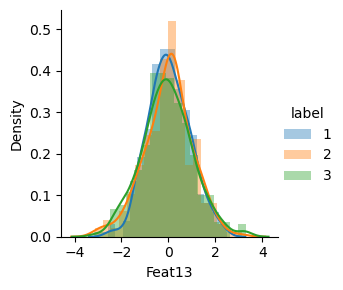

In [52]:
sns.FacetGrid(train_dataframe,hue="label")\
   .map(sns.distplot,"Feat13")\
   .add_legend();
plt.show()

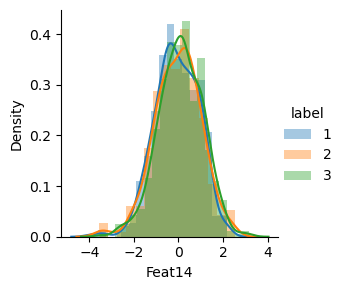

In [53]:
sns.FacetGrid(train_dataframe,hue="label")\
   .map(sns.distplot,"Feat14")\
   .add_legend();
plt.show()

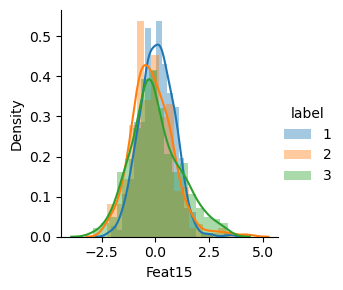

In [54]:
sns.FacetGrid(train_dataframe,hue="label")\
   .map(sns.distplot,"Feat15")\
   .add_legend();
plt.show()

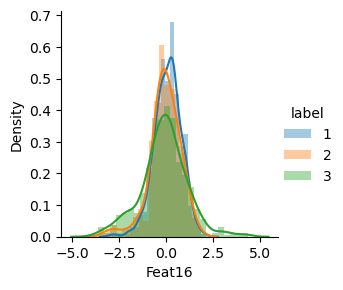

In [55]:
sns.FacetGrid(train_dataframe,hue="label")\
   .map(sns.distplot,"Feat16")\
   .add_legend();
plt.show()

### Observation

Since the kde and histogram plots of different classes overlap with each other it indicates that the each of the independent features are not suitable for the classification of the dataset.

# ***2. Decision tree model with entropy implementation***

## **_2.1 Implementation of the Model_**

In [135]:
def perform_Data_classification(data):
    uniqueClasses, uniqueClassesCounts = numpy.unique(data[:, -1], return_counts = True)
    return uniqueClasses[uniqueClassesCounts.argmax()]

In [136]:
def Purity_chk_bool(dataset):
    if len(numpy.unique(dataset[:, -1])) == 1:
        return True
    else:
        return False

In [137]:
def splitData(data, splitColumn, splitValue):
    splitColumnValues = data[:, splitColumn]
    return data[splitColumnValues <= splitValue], data[splitColumnValues > splitValue]

In [138]:
def Splits_at_potential_feat(dataset, selected_attributes):
    splits_candidates = {}
    num_rows, num_columns = dataset.shape
    attribute_indices = list(range(num_columns - 1))

    if selected_attributes is not None and len(selected_attributes) <= len(attribute_indices):
        attribute_indices = selected_attributes

    for attribute_index in attribute_indices:
        attribute_values = dataset[:, attribute_index]
        unique_attribute_values = np.unique(attribute_values)

        if len(unique_attribute_values) == 1:
            splits_candidates[attribute_index] = unique_attribute_values
        else:
            splits_candidates[attribute_index] = []
            for i in range(len(unique_attribute_values)):
                if i != 0:
                    current_val = unique_attribute_values[i]
                    prev_val = unique_attribute_values[i - 1]
                    splits_candidates[attribute_index].append((current_val + prev_val) / 2)

    return splits_candidates


In [139]:
def calculateEntropy(data):
    _, uniqueClassesCounts = numpy.unique(data[:, -1], return_counts = True)
    probabilities = uniqueClassesCounts / uniqueClassesCounts.sum()
    return sum(probabilities * -numpy.log2(probabilities))

In [140]:
def calculateOverallEntropy(dataBelow, dataAbove):
    pDataBelow = len(dataBelow) / (len(dataBelow) + len(dataAbove))
    pDataAbove = len(dataAbove) / (len(dataBelow) + len(dataAbove))
    return pDataBelow * calculateEntropy(dataBelow) + pDataAbove * calculateEntropy(dataAbove)

In [141]:
def determineBestSplit(data_set, potential_partitions, random_partitions=None):
    best_entropy_so_far = 9999
    optimum_partition_column = 0
    optimum_partition_value = 0
    
    if random_partitions is None:
        for partition_column in potential_partitions:
            for partition_value in potential_partitions[partition_column]:
                below_data, above_data = splitData(data_set, partition_column, partition_value)
                current_entropy = calculateOverallEntropy(below_data, above_data)
                if current_entropy <= best_entropy_so_far:
                    best_entropy_so_far = current_entropy
                    optimum_partition_column = partition_column
                    optimum_partition_value = partition_value
    else:
        for _ in range(random_partitions):
            random_partition_column = random.choice(list(potential_partitions))
            random_partition_value = random.choice(potential_partitions[random_partition_column])
            below_data, above_data = divide_data(data_set, random_partition_column, random_partition_value)
            current_entropy = assess_total_entropy(below_data, above_data)
            if current_entropy <= best_entropy_so_far:
                best_entropy_so_far = current_entropy
                optimum_partition_column = random_partition_column
                optimum_partition_value = random_partition_value
                
    return optimum_partition_column, optimum_partition_value


In [142]:
def buildDecisionTree(data_frame, current_depth=0, min_sample_size=2, max_depth=1000, random_attributes=None, random_splits=None):
    if current_depth == 0:
        global COLUMN_HEADERS
        COLUMN_HEADERS = data_frame.columns
        data = data_frame.values
        if random_attributes is not None and random_attributes <= len(COLUMN_HEADERS) - 1:
            random_attributes = random.sample(population=list(range(len(COLUMN_HEADERS) - 1)), k=random_attributes)
        else:
            random_attributes = None
    else:
        data = data_frame

    if Purity_chk_bool(data) or len(data) < min_sample_size or current_depth == max_depth:
        return perform_Data_classification(data)
    else:
        current_depth += 1
        potential_splits = Splits_at_potential_feat(data, random_attributes)
        split_column, split_value = determineBestSplit(data, potential_splits, random_splits)
        data_below, data_above = splitData(data, split_column, split_value)

        if len(data_below) == 0 or len(data_above) == 0:
            return perform_Data_classification(data)
        else:
            question = str(COLUMN_HEADERS[split_column]) + " <= " + str(split_value)
            decision_sub_tree = {question: []}
            yes_answer = buildDecisionTree(data_below, current_depth, min_sample_size, max_depth, random_attributes, random_splits)
            no_answer = buildDecisionTree(data_above, current_depth, min_sample_size, max_depth, random_attributes, random_splits)

            if yes_answer == no_answer:
                decision_sub_tree = yes_answer
            else:
                decision_sub_tree[question].append(yes_answer)
                decision_sub_tree[question].append(no_answer)

            return decision_sub_tree


In [143]:
def classifySample(sample, decisionTree):
    if not isinstance(decisionTree, dict):
        return decisionTree
    question = list(decisionTree.keys())[0]
    attribute, value = question.split(" <= ")
    if sample[attribute] <= float(value):
        answer = decisionTree[question][0]
    else:
        answer = decisionTree[question][1]
    return classifySample(sample, answer)

In [144]:
def decisionTreePredictions(dataFrame, decisionTree):
    predictions = dataFrame.apply(classifySample, axis = 1, args = (decisionTree,))
    return predictions

In [145]:
def calculateAccuracy(predictedResults, category):
    resultCorrect = predictedResults == category
    return resultCorrect.mean()

In [146]:
i = 1
train_acc = []
cv_acc = []
depth = []
accuracyTrain = 0
while accuracyTrain < 100:
    decisionTree = buildDecisionTree(train_dataframe, max_depth = i)
    decisionTreeTestResults = decisionTreePredictions(validation_dataframe, decisionTree)
    accuracyCV = calculateAccuracy(decisionTreeTestResults, validation_dataframe.iloc[:, -1]) * 100
    cv_acc.append(accuracyCV)
    decisionTreeTrainResults = decisionTreePredictions(train_dataframe, decisionTree)
    accuracyTrain = calculateAccuracy(decisionTreeTrainResults, train_dataframe.iloc[:, -1]) * 100
    train_acc.append(accuracyTrain)
    print("\n maxDepth = {}: ".format(i), end = "")
    print("accuracy of CV = {0:.2f}%, ".format(accuracyCV), end = "")
    print("accuracy of Train = {0:.2f}%, ".format(accuracyTrain), end = "")
    depth.append(i)
    i += 1


 maxDepth = 1: accuracy of CV = 57.39%, accuracy of Train = 58.86%, 
 maxDepth = 2: accuracy of CV = 62.16%, accuracy of Train = 63.38%, 
 maxDepth = 3: accuracy of CV = 64.16%, accuracy of Train = 66.89%, 
 maxDepth = 4: accuracy of CV = 63.16%, accuracy of Train = 69.06%, 
 maxDepth = 5: accuracy of CV = 63.66%, accuracy of Train = 72.41%, 
 maxDepth = 6: accuracy of CV = 62.16%, accuracy of Train = 76.00%, 
 maxDepth = 7: accuracy of CV = 62.66%, accuracy of Train = 81.86%, 
 maxDepth = 8: accuracy of CV = 63.66%, accuracy of Train = 86.04%, 
 maxDepth = 9: accuracy of CV = 60.90%, accuracy of Train = 91.22%, 
 maxDepth = 10: accuracy of CV = 59.65%, accuracy of Train = 95.07%, 
 maxDepth = 11: accuracy of CV = 58.40%, accuracy of Train = 97.91%, 
 maxDepth = 12: accuracy of CV = 58.90%, accuracy of Train = 98.91%, 
 maxDepth = 13: accuracy of CV = 58.65%, accuracy of Train = 99.67%, 
 maxDepth = 14: accuracy of CV = 58.65%, accuracy of Train = 99.92%, 
 maxDepth = 15: accuracy of 

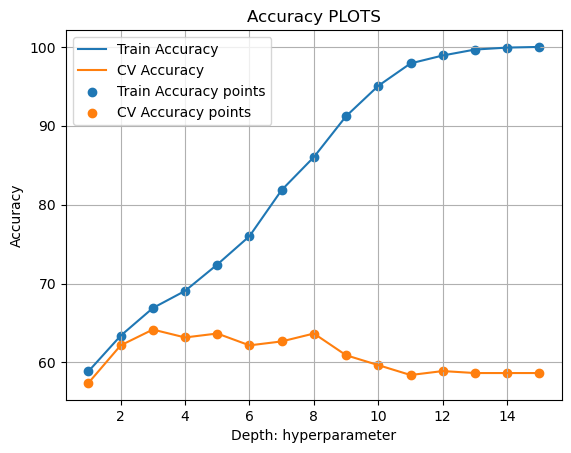

In [149]:
plt.plot(depth, train_acc, label='Train Accuracy')
plt.plot(depth, cv_acc, label='CV Accuracy')

plt.scatter(depth, train_acc, label='Train Accuracy points')
plt.scatter(depth, cv_acc, label='CV Accuracy points')

plt.legend()
plt.xlabel("Depth: hyperparameter")
plt.ylabel("Accuracy")
plt.title("Accuracy PLOTS")
plt.grid()
plt.show()

In [150]:
decisionTree = buildDecisionTree(test_dataframe, max_depth = 5)
decisionTreeTestdataResults = decisionTreePredictions(test_dataframe, decisionTree)
accuracytest = calculateAccuracy(decisionTreeTestdataResults, test_dataframe.iloc[:, -1]) * 100

In [151]:
print(accuracytest)

79.9498746867168


In [152]:
y_test

[3,
 3,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 3,
 3,
 1,
 2,
 2,
 2,
 2,
 1,
 1,
 3,
 1,
 2,
 3,
 3,
 3,
 3,
 1,
 1,
 1,
 3,
 2,
 3,
 2,
 1,
 1,
 3,
 3,
 3,
 1,
 3,
 2,
 1,
 1,
 3,
 3,
 3,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 3,
 1,
 2,
 3,
 1,
 3,
 1,
 2,
 3,
 2,
 3,
 3,
 1,
 3,
 1,
 2,
 1,
 3,
 2,
 2,
 2,
 3,
 1,
 3,
 2,
 3,
 3,
 1,
 3,
 1,
 3,
 2,
 3,
 3,
 3,
 3,
 2,
 3,
 2,
 3,
 1,
 2,
 1,
 3,
 2,
 3,
 1,
 3,
 3,
 3,
 2,
 1,
 3,
 1,
 3,
 1,
 2,
 3,
 3,
 3,
 1,
 3,
 3,
 3,
 3,
 1,
 1,
 1,
 3,
 3,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 3,
 3,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 1,
 1,
 3,
 2,
 3,
 3,
 1,
 1,
 3,
 3,
 3,
 1,
 1,
 1,
 1,
 3,
 3,
 2,
 3,
 3,
 3,
 2,
 2,
 3,
 2,
 2,
 3,
 1,
 3,
 3,
 1,
 1,
 2,
 2,
 2,
 3,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 3,
 3,
 2,
 3,
 2,
 3,
 3,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 1,
 2,
 1,
 3,
 3,
 3,
 2,
 3,
 2,
 3,
 2,
 2,
 1,
 3,
 3,
 2,
 1,
 2,
 3,
 3,
 1,
 2,
 3,
 3,
 3,
 1,
 3,
 3,
 3,
 1,
 3,
 1,
 3,
 3,
 3,
 3,
 2,
 2,
 1,
 1,
 2,
 2,
 3,
 3,
 2,
 1,
 3,
 1,
 2,
 1,
 2,


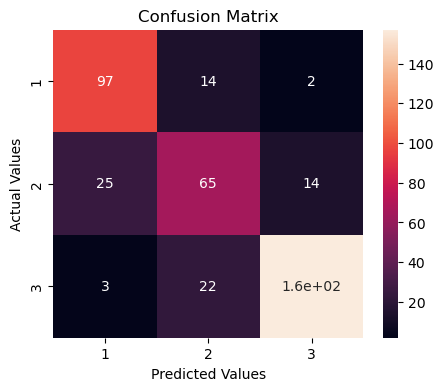

In [153]:
cm = confusion_matrix(y_test, decisionTreeTestdataResults)
cm_df = pd.DataFrame(cm,index = ['1','2','3'], columns = ['1','2','3'])
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [154]:
tpforclass1 = cm[0][0]
fnforclass1 = cm[0][1] + cm[0][2]
tnforclass1 = cm[1][1] + cm[1][2] + cm[2][1] + cm[2][2]
fpforclass1 = cm[1][0] + cm[2][0]

recallforclass1 = (tpforclass1) / (tpforclass1 + fnforclass1)
precisionforclass1 = (tpforclass1) / (tpforclass1 + fpforclass1)
f1scoreforclass1 = (2 * precisionforclass1 * recallforclass1) / (precisionforclass1 + recallforclass1)

tpforclass2 = cm[1][1]
fnforclass2 = cm[1][0] + cm[1][2]
tnforclass2 = cm[0][0] + cm[0][2] + cm[2][0] + cm[2][2]
fpforclass2 = cm[0][1] + cm[2][1]

recallforclass2 = (tpforclass2) / (tpforclass2 + fnforclass2)
precisionforclass2 = (tpforclass2) / (tpforclass2 + fpforclass2)
f1scoreforclass2 = (2 * precisionforclass2 * recallforclass2) / (precisionforclass2 + recallforclass2)

tpforclass3 = cm[2][2]
fnforclass3 = cm[1][0] + cm[1][2]
tnforclass3 = cm[0][0] + cm[0][2] + cm[2][0] + cm[2][2]
fpforclass3 = cm[0][1] + cm[2][1]

recallforclass3 = (tpforclass3) / (tpforclass3 + fnforclass3)
precisionforclass3 = (tpforclass3) / (tpforclass3 + fpforclass3)
f1scoreforclass3 = (2 * precisionforclass3 * recallforclass3) / (precisionforclass3 + recallforclass3)

print("Values of Class 1 evaluation metrics ---------- \n")
print("Precision of Class 1 is ")
print(precisionforclass1)
print("Recall of Class 1 is ")
print(recallforclass1)
print("F1-Score of Class 1 is ")
print(f1scoreforclass1)
print("Values of Class 2 evaluation metrics ---------- \n")
print("Precision of Class 2 is ")
print(precisionforclass2)
print("Recall of Class 2 is ")
print(recallforclass2)
print("F1-Score of Class 2 is ")
print(f1scoreforclass2)
print("Values of Class 3 evaluation metrics ---------- \n")
print("Precision of Class 3 is ")
print(precisionforclass3)
print("Recall of Class 3 is ")
print(recallforclass3)
print("F1-Score of Class 3 is ")
print(f1scoreforclass3)




Values of Class 1 evaluation metrics ---------- 

Precision of Class 1 is 
0.776
Recall of Class 1 is 
0.8584070796460177
F1-Score of Class 1 is 
0.8151260504201682
Values of Class 2 evaluation metrics ---------- 

Precision of Class 2 is 
0.6435643564356436
Recall of Class 2 is 
0.625
F1-Score of Class 2 is 
0.6341463414634146
Values of Class 3 evaluation metrics ---------- 

Precision of Class 3 is 
0.8134715025906736
Recall of Class 3 is 
0.8010204081632653
F1-Score of Class 3 is 
0.80719794344473


## **_2.2 Insights drawn (plots, markdown explanations)_**

1) We have used validation data in order to find the correct value of the hyperparameter Depth of the Decision Tree.<br> 
2) From the train accuracy and cross validation accuracy plots we can see that as the depth value increases, the train accuracy     gets higher while cross-validation accuracy remains almost same indicating the occurence of overfitting with the increase in     tree depth.<br>
3) At Depth = 5, there is a proper balnace between Train accuracy and Cross-Validation accuracy which proves that it is the best    value using which the performance of the model can be evaluated on unseen data.<br>
3) The confusion matrix has very high values along the major diagonal indicating that the model is able to classify a very high    number of unseen datapoints accurately.<br> 
4) The F1-Score for all the classes are > 0.5 indicating an appreciable performance of the model on unseen dataset.

# ***3. Adaboost***

## **_3.1 Implementation of the Model_**

In [155]:
import numpy as np
from numpy.core.umath_tests import inner1d
from copy import deepcopy
from sklearn.tree import DecisionTreeClassifier

class AdaBoostClassifier(object):
    
    
    def __init__(self, *args, **kwargs):
        if kwargs and args:
            raise ValueError(
                '''AdaBoostClassifier can only be called with keyword
                   arguments for the following keywords: base_estimator ,n_estimators,
                    learning_rate,algorithm,random_state''')
        allowed_keys = ['base_estimator', 'n_estimators', 'learning_rate', 'algorithm', 'random_state']
        keywords_used = kwargs.keys()
        for keyword in keywords_used:
            if keyword not in allowed_keys:
                raise ValueError(keyword + ":  Wrong keyword used --- check spelling")

        n_estimators = 50
        learning_rate = 1
        algorithm = 'SAMME.R'
        random_state = None

        if kwargs and not args:
            if 'base_estimator' in kwargs:
                base_estimator = kwargs.pop('base_estimator')
            else:
                raise ValueError('''base_estimator can not be None''')
            if 'n_estimators' in kwargs: n_estimators = kwargs.pop('n_estimators')
            if 'learning_rate' in kwargs: learning_rate = kwargs.pop('learning_rate')
            if 'algorithm' in kwargs: algorithm = kwargs.pop('algorithm')
            if 'random_state' in kwargs: random_state = kwargs.pop('random_state')

        self.base_estimator_ = base_estimator
        self.n_estimators_ = n_estimators
        self.learning_rate_ = learning_rate
        self.algorithm_ = algorithm
        self.random_state_ = random_state
        self.estimators_ = list()
        self.estimator_weights_ = np.zeros(self.n_estimators_)
        self.estimator_errors_ = np.ones(self.n_estimators_)


    def _samme_proba(self, estimator, n_classes, X):
        
        proba = estimator.predict_proba(X)

        # Displace zero probabilities so the log is defined.
        # Also fix negative elements which may occur with
        # negative sample weights.
        proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
        log_proba = np.log(proba)

        return (n_classes - 1) * (log_proba - (1. / n_classes)
                                  * log_proba.sum(axis=1)[:, np.newaxis])


    def fit(self, X, y):
        self.n_samples = X.shape[0]
        # There is hidden trouble for classes, here the classes will be sorted.
        # So in boost we have to ensure that the predict results have the same classes sort
        self.classes_ = np.array(sorted(list(set(y))))
        self.n_classes_ = len(self.classes_)
        for iboost in range(self.n_estimators_):
            if iboost == 0:
                sample_weight = np.ones(self.n_samples) / self.n_samples

            sample_weight, estimator_weight, estimator_error = self.boost(X, y, sample_weight)

            # early stop
            if estimator_error == None:
                break

            # append error and weight
            self.estimator_errors_[iboost] = estimator_error
            self.estimator_weights_[iboost] = estimator_weight

            if estimator_error <= 0:
                break

        return self


    def boost(self, X, y, sample_weight):
        if self.algorithm_ == 'SAMME':
            return self.discrete_boost(X, y, sample_weight)
        elif self.algorithm_ == 'SAMME.R':
            return self.real_boost(X, y, sample_weight)

    def real_boost(self, X, y, sample_weight):
        estimator = deepcopy(self.base_estimator_)
        if self.random_state_:
            estimator.set_params(random_state=1)

        estimator.fit(X, y, sample_weight=sample_weight)

        y_pred = estimator.predict(X)
        incorrect = y_pred != y
        estimator_error = np.dot(incorrect, sample_weight) / np.sum(sample_weight, axis=0)

        # if worse than random guess, stop boosting
        if estimator_error >= 1.0 - 1 / self.n_classes_:
            return None, None, None

        y_predict_proba = estimator.predict_proba(X)
        # repalce zero
        y_predict_proba[y_predict_proba < np.finfo(y_predict_proba.dtype).eps] = np.finfo(y_predict_proba.dtype).eps

        y_codes = np.array([-1. / (self.n_classes_ - 1), 1.])
        y_coding = y_codes.take(np.array(self.classes_) == y[:, np.newaxis])

        # for sample weight update
        intermediate_variable = (-1. * self.learning_rate_ * (((self.n_classes_ - 1) / self.n_classes_) *
                                                              inner1d(y_coding, np.log(
                                                                  y_predict_proba))))  #dot iterate for each row

        # update sample weight
        sample_weight *= np.exp(intermediate_variable)

        sample_weight_sum = np.sum(sample_weight, axis=0)
        if sample_weight_sum <= 0:
            return None, None, None

        # normalize sample weight
        sample_weight /= sample_weight_sum

        # append the estimator
        self.estimators_.append(estimator)

        return sample_weight, 1, estimator_error


    def discrete_boost(self, X, y, sample_weight):
        estimator = deepcopy(self.base_estimator_)
        if self.random_state_:
            estimator.set_params(random_state=1)

        estimator.fit(X, y, sample_weight=sample_weight)

        y_pred = estimator.predict(X)
        incorrect = y_pred != y
        estimator_error = np.dot(incorrect, sample_weight) / np.sum(sample_weight, axis=0)

        # if worse than random guess, stop boosting
        if estimator_error >= 1 - 1 / self.n_classes_:
            return None, None, None

        # update estimator_weight
        estimator_weight = self.learning_rate_ * np.log((1 - estimator_error) / estimator_error) + np.log(
            self.n_classes_ - 1)

        if estimator_weight <= 0:
            return None, None, None

        # update sample weight
        sample_weight *= np.exp(estimator_weight * incorrect)

        sample_weight_sum = np.sum(sample_weight, axis=0)
        if sample_weight_sum <= 0:
            return None, None, None

        # normalize sample weight
        sample_weight /= sample_weight_sum

        # append the estimator
        self.estimators_.append(estimator)

        return sample_weight, estimator_weight, estimator_error

    def predict(self, X):
        n_classes = self.n_classes_
        classes = self.classes_[:, np.newaxis]
        pred = None

        if self.algorithm_ == 'SAMME.R':
            # The weights are all 1. for SAMME.R
            pred = sum(self._samme_proba(estimator, n_classes, X) for estimator in self.estimators_)
        else:  # self.algorithm == "SAMME"
            pred = sum((estimator.predict(X) == classes).T * w
                       for estimator, w in zip(self.estimators_,
                                               self.estimator_weights_))

        pred /= self.estimator_weights_.sum()
        if n_classes == 2:
            pred[:, 0] *= -1
            pred = pred.sum(axis=1)
            return self.classes_.take(pred > 0, axis=0)

        return self.classes_.take(np.argmax(pred, axis=1), axis=0)


    def predict_proba(self, X):
        if self.algorithm_ == 'SAMME.R':
            # The weights are all 1. for SAMME.R
            proba = sum(self._samme_proba(estimator, self.n_classes_, X)
                        for estimator in self.estimators_)
        else:  # self.algorithm == "SAMME"
            proba = sum(estimator.predict_proba(X) * w
                        for estimator, w in zip(self.estimators_,
                                                self.estimator_weights_))

        proba /= self.estimator_weights_.sum()
        proba = np.exp((1. / (n_classes - 1)) * proba)
        normalizer = proba.sum(axis=1)[:, np.newaxis]
        normalizer[normalizer == 0.0] = 1.0
        proba /= normalizer

        return proba

In [156]:
train_accuracy_score=[]
val_accuracy_score=[]
learning_rate = []
num_estimators = [] 
for lr in np.arange(0.05,1.05,0.05):
    for ne in [10,50,100,500,1000]:

        bdt_real_test = AdaBoostClassifier(
            base_estimator=DecisionTreeClassifier(max_depth=3),
            n_estimators=ne,
            learning_rate=lr)
        bdt_real_test.fit(train_dataframe.iloc[:,0:14].to_numpy(), train_dataframe['label'].to_numpy())
        pred = bdt_real_test.predict(validation_dataframe.iloc[:,0:14].to_numpy())
        val_acc = accuracy_score(pred,validation_dataframe['label'].to_numpy())
        train_pred = bdt_real_test.predict(train_dataframe.iloc[:,0:14].to_numpy())
        train_acc = accuracy_score(train_pred,train_dataframe['label'].to_numpy())
        train_accuracy_score.append(train_acc)
        val_accuracy_score.append(val_acc)
        learning_rate.append(lr)
        num_estimators.append(ne)
        print("\n learning rate = {}: ".format(lr), end = "")
        print(" Number of estimators = {}: ".format(ne), end = "")
        print("accuracy of CV = {0:.2f}%, ".format(val_acc), end = "")
        print("accuracy of Train = {0:.2f}%, ".format(train_acc), end = "")


 learning rate = 0.05:  Number of estimators = 10: accuracy of CV = 0.65%, accuracy of Train = 0.70%, 
 learning rate = 0.05:  Number of estimators = 50: accuracy of CV = 0.65%, accuracy of Train = 0.78%, 
 learning rate = 0.05:  Number of estimators = 100: accuracy of CV = 0.62%, accuracy of Train = 0.83%, 
 learning rate = 0.05:  Number of estimators = 500: accuracy of CV = 0.62%, accuracy of Train = 0.92%, 
 learning rate = 0.05:  Number of estimators = 1000: accuracy of CV = 0.59%, accuracy of Train = 0.95%, 
 learning rate = 0.1:  Number of estimators = 10: accuracy of CV = 0.68%, accuracy of Train = 0.71%, 
 learning rate = 0.1:  Number of estimators = 50: accuracy of CV = 0.66%, accuracy of Train = 0.81%, 
 learning rate = 0.1:  Number of estimators = 100: accuracy of CV = 0.65%, accuracy of Train = 0.87%, 
 learning rate = 0.1:  Number of estimators = 500: accuracy of CV = 0.61%, accuracy of Train = 0.95%, 
 learning rate = 0.1:  Number of estimators = 1000: accuracy of CV = 0

In [157]:
trace1 = go.Scatter3d(x=learning_rate,y=num_estimators,z= train_accuracy_score, name = 'train')
trace2 = go.Scatter3d(x=learning_rate,y=num_estimators,z=val_accuracy_score, name = 'Cross validation')
data = [trace1, trace2]

layout = go.Layout(scene = dict(
        xaxis = dict(title='learning rate'),
        yaxis = dict(title='num of estimators'),
        zaxis = dict(title='Accuracy'),))

fig = go.Figure(data=data, layout=layout)
offline.iplot(fig, filename='3d-scatter-colorscale')

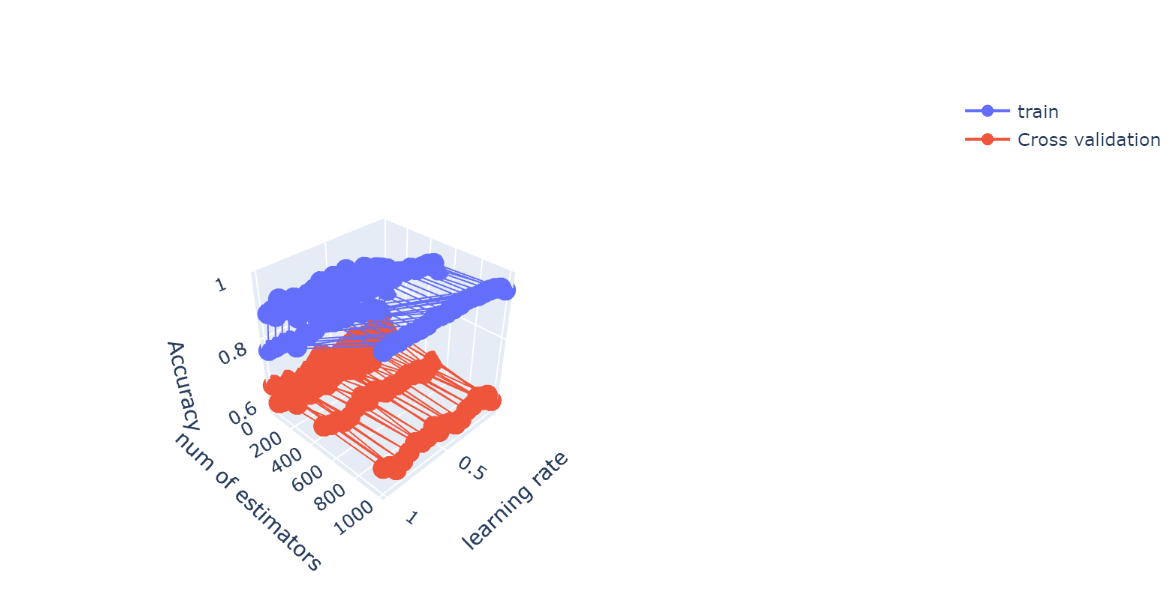

In [158]:
print('Best num of estimators is',10,'Best learning rate ',0.4)
#print(accuracy_score(bdt_real.predict(X_test),y_test))
bdt_real_test = AdaBoostClassifier(
            base_estimator=DecisionTreeClassifier(max_depth=3),
            n_estimators=10,
            learning_rate=0.4)
bdt_real_test.fit(train_dataframe.iloc[:,0:14].to_numpy(), train_dataframe['label'].to_numpy())
test_pred = bdt_real_test.predict(test_dataframe.iloc[:,0:14].to_numpy())
print(accuracy_score(test_pred,test_dataframe['label'].to_numpy()))

Best num of estimators is 10 Best learning rate  0.4
0.6992481203007519


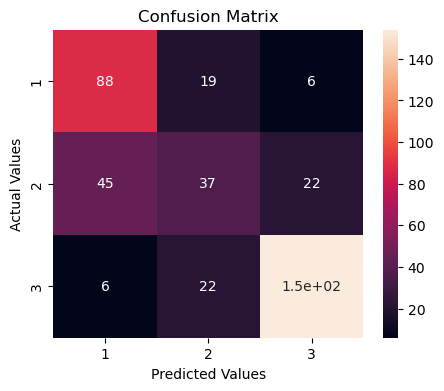

In [159]:
cm = confusion_matrix(y_test, test_pred)
cm_df = pd.DataFrame(cm,index = ['1','2','3'], columns = ['1','2','3'])
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [160]:
tpforclass1 = cm[0][0]
fnforclass1 = cm[0][1] + cm[0][2]
tnforclass1 = cm[1][1] + cm[1][2] + cm[2][1] + cm[2][2]
fpforclass1 = cm[1][0] + cm[2][0]

recallforclass1 = (tpforclass1) / (tpforclass1 + fnforclass1)
precisionforclass1 = (tpforclass1) / (tpforclass1 + fpforclass1)
f1scoreforclass1 = (2 * precisionforclass1 * recallforclass1) / (precisionforclass1 + recallforclass1)

tpforclass2 = cm[1][1]
fnforclass2 = cm[1][0] + cm[1][2]
tnforclass2 = cm[0][0] + cm[0][2] + cm[2][0] + cm[2][2]
fpforclass2 = cm[0][1] + cm[2][1]

recallforclass2 = (tpforclass2) / (tpforclass2 + fnforclass2)
precisionforclass2 = (tpforclass2) / (tpforclass2 + fpforclass2)
f1scoreforclass2 = (2 * precisionforclass2 * recallforclass2) / (precisionforclass2 + recallforclass2)

tpforclass3 = cm[2][2]
fnforclass3 = cm[1][0] + cm[1][2]
tnforclass3 = cm[0][0] + cm[0][2] + cm[2][0] + cm[2][2]
fpforclass3 = cm[0][1] + cm[2][1]

recallforclass3 = (tpforclass3) / (tpforclass3 + fnforclass3)
precisionforclass3 = (tpforclass3) / (tpforclass3 + fpforclass3)
f1scoreforclass3 = (2 * precisionforclass3 * recallforclass3) / (precisionforclass3 + recallforclass3)

print("Values of Class 1 evaluation metrics ---------- \n")
print("Precision of Class 1 is ")
print(precisionforclass1)
print("Recall of Class 1 is ")
print(recallforclass1)
print("F1-Score of Class 1 is ")
print(f1scoreforclass1)
print("Values of Class 2 evaluation metrics ---------- \n")
print("Precision of Class 2 is ")
print(precisionforclass2)
print("Recall of Class 2 is ")
print(recallforclass2)
print("F1-Score of Class 2 is ")
print(f1scoreforclass2)
print("Values of Class 3 evaluation metrics ---------- \n")
print("Precision of Class 3 is ")
print(precisionforclass3)
print("Recall of Class 3 is ")
print(recallforclass3)
print("F1-Score of Class 3 is ")
print(f1scoreforclass3)




Values of Class 1 evaluation metrics ---------- 

Precision of Class 1 is 
0.6330935251798561
Recall of Class 1 is 
0.7787610619469026
F1-Score of Class 1 is 
0.6984126984126984
Values of Class 2 evaluation metrics ---------- 

Precision of Class 2 is 
0.47435897435897434
Recall of Class 2 is 
0.3557692307692308
F1-Score of Class 2 is 
0.4065934065934066
Values of Class 3 evaluation metrics ---------- 

Precision of Class 3 is 
0.7897435897435897
Recall of Class 3 is 
0.6968325791855203
F1-Score of Class 3 is 
0.7403846153846153


## **_3.2 Insights drawn (plots, markdown explanations)_**

1) Here we have taken the Base Learners to be Decision Trees.
1) We have used validation data in order to find the correct value of two hyperparameters: number of estimators and learning rate.<br> 
2) From the train accuracy and cross validation accuracy plots we can see that as the number of base learners and learning rate increases, the train accuracy gets higher while cross-validation accuracy remains almost same indicating the occurence of overfitting with the increase in the number of base learners and learning rate.<br>
3) At Number of estimators = 10 and learning rate = 0.4 , there is a proper balance between Train accuracy and Cross-Validation accuracy which proves that it is the best value using which the performance of the model can be evaluated on unseen data.<br>
4) The confusion matrix has very high values along the major diagonal indicating that the model is able to classify a very high    number of unseen datapoints accurately.<br> 
5) The F1-Score for all the classes are > 0.5 indicating an appreciable performance of the model on unseen dataset.

# **_4. Multiclass SVM_**

## **_4.1 Implementation of the Model_**

In [161]:
import numpy as np

class MulticlassSVM:
    def __init__(self,learning_rate=0.01, epochs=1000, regularization_strength=1):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.regularization_strength = regularization_strength
        self.weights = None
        self.classes = None

    def one_vs_all(self, X, y, class_label):
        binary_labels = np.where(y == class_label, 1, -1)
        weights = np.zeros(X.shape[1])
        for epoch in range(self.epochs):
            for i, x in enumerate(X):
                margin = binary_labels[i] * np.dot(weights, x)
                if margin < 1:
                    gradient = -binary_labels[i] * x + 2 * self.regularization_strength * weights
                else:
                    gradient = 2 * self.regularization_strength * weights
                weights -= self.learning_rate * gradient
        return weights

    def fit(self, X, y):
        self.classes = np.unique(y)
        self.weights = np.zeros((len(self.classes), X.shape[1]))

        for i, class_label in enumerate(self.classes):
            self.weights[i, :] = self.one_vs_all(X, y, class_label)

    def predict_one_vs_all(self, x):
        scores = np.dot(self.weights, x)
        return np.argmax(scores)

    def predict(self, X):
        predictions = [self.predict_one_vs_all(x) for x in X]
        return np.array(predictions)

# Example usage:
# Assume X_train and y_train are your training data
# Assume X_test is your test data




In [162]:
svm = MulticlassSVM()
svm.fit(X_train, y_train)
predictions = svm.predict(X_test)

In [163]:
train_accuracy_score=[]
val_accuracy_score=[]
learning_rate = []
regularization_strength = [] 
for lr in np.arange(0.05,1.05,0.05):
    for rs in [0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]:

        svm = MulticlassSVM(learning_rate = lr,regularization_strength = rs)
        svm.fit(X_train, y_train)
        pred = svm.predict(X_validation)
        val_acc = accuracy_score(pred,y_validation)
        train_pred = svm.predict(X_train)
        train_acc = accuracy_score(train_pred,y_train)
        train_accuracy_score.append(train_acc)
        val_accuracy_score.append(val_acc)
        learning_rate.append(lr)
        regularization_strength.append(rs)
        print("\n learning rate = {}: ".format(lr), end = "")
        print(" Regularisation Strength = {}: ".format(rs), end = "")
        print("accuracy of CV = {0:.2f}%, ".format(val_acc), end = "")
        print("accuracy of Train = {0:.2f}%, ".format(train_acc), end = "")


 learning rate = 0.05:  Regularisation Strength = 0.2: accuracy of CV = 0.13%, accuracy of Train = 0.12%, 
 learning rate = 0.05:  Regularisation Strength = 0.3: accuracy of CV = 0.15%, accuracy of Train = 0.14%, 
 learning rate = 0.05:  Regularisation Strength = 0.4: accuracy of CV = 0.16%, accuracy of Train = 0.14%, 
 learning rate = 0.05:  Regularisation Strength = 0.5: accuracy of CV = 0.17%, accuracy of Train = 0.14%, 
 learning rate = 0.05:  Regularisation Strength = 0.6: accuracy of CV = 0.18%, accuracy of Train = 0.14%, 
 learning rate = 0.05:  Regularisation Strength = 0.7: accuracy of CV = 0.18%, accuracy of Train = 0.14%, 
 learning rate = 0.05:  Regularisation Strength = 0.8: accuracy of CV = 0.18%, accuracy of Train = 0.14%, 
 learning rate = 0.05:  Regularisation Strength = 0.9: accuracy of CV = 0.18%, accuracy of Train = 0.15%, 
 learning rate = 0.05:  Regularisation Strength = 1: accuracy of CV = 0.17%, accuracy of Train = 0.14%, 
 learning rate = 0.1:  Regularisation 

 learning rate = 0.8500000000000001:  Regularisation Strength = 0.3: accuracy of CV = 0.17%, accuracy of Train = 0.15%, 
 learning rate = 0.8500000000000001:  Regularisation Strength = 0.4: accuracy of CV = 0.19%, accuracy of Train = 0.17%, 
 learning rate = 0.8500000000000001:  Regularisation Strength = 0.5: accuracy of CV = 0.18%, accuracy of Train = 0.17%, 
 learning rate = 0.8500000000000001:  Regularisation Strength = 0.6: accuracy of CV = 0.19%, accuracy of Train = 0.20%, 
 learning rate = 0.8500000000000001:  Regularisation Strength = 0.7: accuracy of CV = 0.13%, accuracy of Train = 0.14%, 
 learning rate = 0.8500000000000001:  Regularisation Strength = 0.8: accuracy of CV = 0.14%, accuracy of Train = 0.14%, 
 learning rate = 0.8500000000000001:  Regularisation Strength = 0.9: accuracy of CV = 0.13%, accuracy of Train = 0.14%, 
 learning rate = 0.8500000000000001:  Regularisation Strength = 1: accuracy of CV = 0.12%, accuracy of Train = 0.13%, 
 learning rate = 0.900000000000000

In [164]:
trace1 = go.Scatter3d(x=learning_rate,y=regularization_strength,z= train_accuracy_score, name = 'train')
trace2 = go.Scatter3d(x=learning_rate,y=regularization_strength,z=val_accuracy_score, name = 'Cross validation')
data = [trace1, trace2]

layout = go.Layout(scene = dict(
        xaxis = dict(title='learning rate'),
        yaxis = dict(title='num of estimators'),
        zaxis = dict(title='Accuracy'),))

fig = go.Figure(data=data, layout=layout)
offline.iplot(fig, filename='3d-scatter-colorscale')

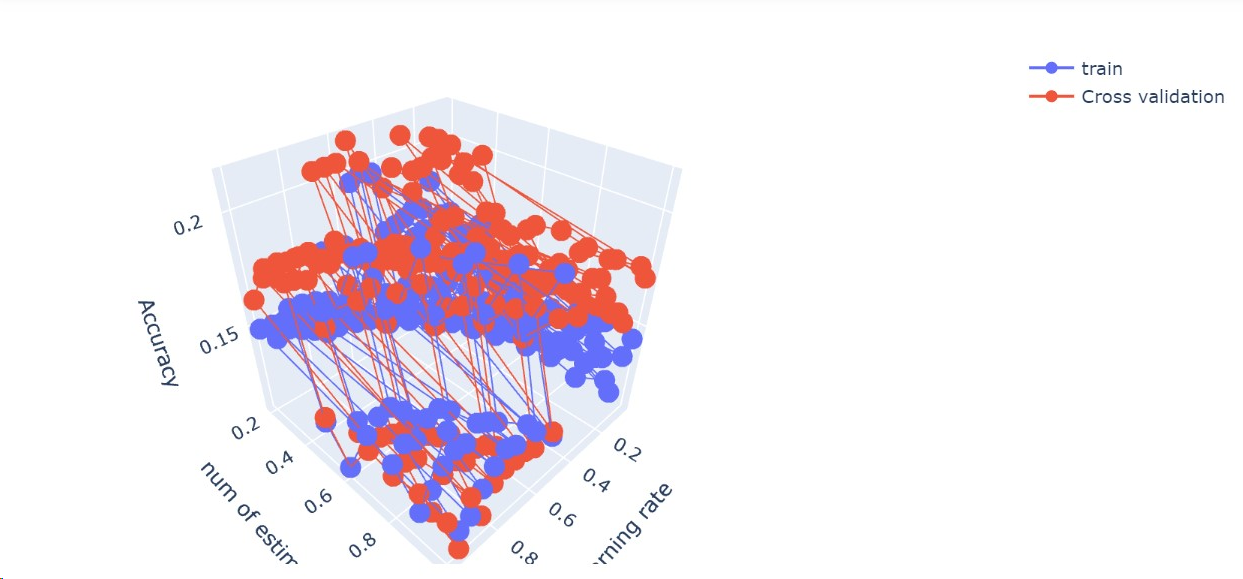

In [165]:
print('Best regularisation strength is',0.2,'Best learning rate ',0.65)
#print(accuracy_score(bdt_real.predict(X_test),y_test))
svm_test = MulticlassSVM(learning_rate = 0.65,regularization_strength =0.2 )
svm_test.fit(X_train,y_train)
test_pred = svm_test.predict(X_test)
print(accuracy_score(test_pred,y_test))

Best regularisation strength is 0.2 Best learning rate  0.65
0.15538847117794485


In [166]:
final_pred = []
for i in test_pred:
        final_pred.append(i+1)
        

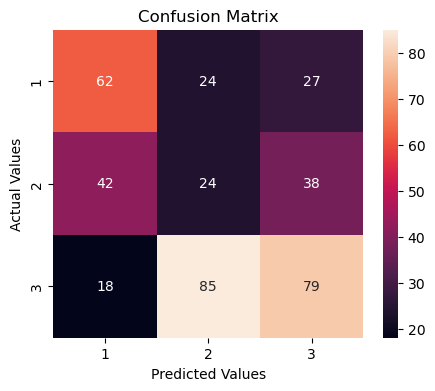

In [167]:
cm = confusion_matrix(y_test, final_pred)
cm_df = pd.DataFrame(cm,index = ['1','2','3'], columns = ['1','2','3'])
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [168]:
tpforclass1 = cm[0][0]
fnforclass1 = cm[0][1] + cm[0][2]
tnforclass1 = cm[1][1] + cm[1][2] + cm[2][1] + cm[2][2]
fpforclass1 = cm[1][0] + cm[2][0]

recallforclass1 = (tpforclass1) / (tpforclass1 + fnforclass1)
precisionforclass1 = (tpforclass1) / (tpforclass1 + fpforclass1)
f1scoreforclass1 = (2 * precisionforclass1 * recallforclass1) / (precisionforclass1 + recallforclass1)

tpforclass2 = cm[1][1]
fnforclass2 = cm[1][0] + cm[1][2]
tnforclass2 = cm[0][0] + cm[0][2] + cm[2][0] + cm[2][2]
fpforclass2 = cm[0][1] + cm[2][1]

recallforclass2 = (tpforclass2) / (tpforclass2 + fnforclass2)
precisionforclass2 = (tpforclass2) / (tpforclass2 + fpforclass2)
f1scoreforclass2 = (2 * precisionforclass2 * recallforclass2) / (precisionforclass2 + recallforclass2)

tpforclass3 = cm[2][2]
fnforclass3 = cm[1][0] + cm[1][2]
tnforclass3 = cm[0][0] + cm[0][2] + cm[2][0] + cm[2][2]
fpforclass3 = cm[0][1] + cm[2][1]

recallforclass3 = (tpforclass3) / (tpforclass3 + fnforclass3)
precisionforclass3 = (tpforclass3) / (tpforclass3 + fpforclass3)
f1scoreforclass3 = (2 * precisionforclass3 * recallforclass3) / (precisionforclass3 + recallforclass3)

print("Values of Class 1 evaluation metrics ---------- \n")
print("Precision of Class 1 is ")
print(precisionforclass1)
print("Recall of Class 1 is ")
print(recallforclass1)
print("F1-Score of Class 1 is ")
print(f1scoreforclass1)
print("Values of Class 2 evaluation metrics ---------- \n")
print("Precision of Class 2 is ")
print(precisionforclass2)
print("Recall of Class 2 is ")
print(recallforclass2)
print("F1-Score of Class 2 is ")
print(f1scoreforclass2)
print("Values of Class 3 evaluation metrics ---------- \n")
print("Precision of Class 3 is ")
print(precisionforclass3)
print("Recall of Class 3 is ")
print(recallforclass3)
print("F1-Score of Class 3 is ")
print(f1scoreforclass3)




Values of Class 1 evaluation metrics ---------- 

Precision of Class 1 is 
0.5081967213114754
Recall of Class 1 is 
0.5486725663716814
F1-Score of Class 1 is 
0.5276595744680852
Values of Class 2 evaluation metrics ---------- 

Precision of Class 2 is 
0.18045112781954886
Recall of Class 2 is 
0.23076923076923078
F1-Score of Class 2 is 
0.20253164556962025
Values of Class 3 evaluation metrics ---------- 

Precision of Class 3 is 
0.42021276595744683
Recall of Class 3 is 
0.4968553459119497
F1-Score of Class 3 is 
0.45533141210374645


## **_4.2 Insights drawn (plots, markdown explanations)_**

1) We have used validation data in order to find the correct value of the hyperparameters Regularization parameter and Learning rate.<br> 
2) From the train accuracy and cross validation accuracy plots we can see that as the Regularization parameter and Learning rate value increases, the train accuracy gets higher while cross-validation accuracy remains almost same indicating the occurence of overfitting with the increase in hyperparameter values.<br>
3) At Regularization parameter = 0.2 and learning rate = 0.65, there is a proper balance between Train accuracy and Cross-Validation accuracy which proves that it is the best value using which the performance of the model can be evaluated on unseen data.<br>
3) The confusion matrix has less high values along the major diagonal indicating that the model is able to classify a certain    number of unseen datapoints accurately.<br> 
4) The F1-Score for all the classes are < 0.5 indicating that the performance of the model on unseen dataset is not appreciable.

### Comparison of performance between 3 Models

By comparing the confusion matrix and F1-Scores of the 3 models we can conclude that the performance of the Decision Tree on the unseen dataset is the best, followed by Adaboost and then Multiclass SVM. Multiclass SVM has the worst performance when compared with the three models. This can be attributed to the fact that normal one vs rest SVM classifiers are linear classification models. There may be some datapoints which may be present in the regions of ambiguity which cannot be correctly classified by SVM resulting in the degradation in its performance.  


# **_5. References_**

1.   Journal Article "Multi-class adaboost" Hastie, Trevor,A Rosset, Saharonhu, Ji Zou, Hui. Internation Journal of Statistics        and its Interface Volume 2 Pages 349-360 1938-7997 International Press of Boston. <br>
2.   https://hastie.su.domains/Papers/samme.pdf <br>

3.   Multiclass Classification Using SVM : https://www.analyticsvidhya.com/blog/2021/05/multiclass-classification-using-svm/

4.   Multiclass Classification with Support Vector Machines (SVM), Dual Problem and Kernel Functions:         https://towardsdatascience.com/multiclass-classification-with-support-vector-machines-svm-kernel-trick-kernel-functions-f9d5377d6f02 <br>

5.   Decision Tree Algorithm for Multiclass problems: https://towardsdatascience.com/decision-tree-algorithm-for-multiclass-problems-using-python-6b0ec1183bf5

6.   Multi-class Classification using Decision-Tree Model: https://adityagoel123.medium.com/multi-class-classification-using-decision-tree-model-68e75114303

